In [15]:
import os
import cv2
import numpy as np

In [16]:
folders = {
    "crazing": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/crazing",
    "inclusion": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/inclusion",
    "patch": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/patches",
    "pitted_surface": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/pitted_surface",
    "rolled-in_scale": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/rolled-in_scale",
    "scratches": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/scratches"
}

In [17]:
def calculate_gray_level_stats(folder_path):
    gray_levels = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        gray_levels.extend(img.flatten())
    min_gray_level = np.min(gray_levels)
    max_gray_level = np.max(gray_levels)
    median_gray_level = np.median(gray_levels)
    return min_gray_level, max_gray_level, median_gray_level

In [18]:
for folder_name, folder_path in folders.items():
    min_level, max_level, median_level = calculate_gray_level_stats(folder_path)
    print(f"Folder: {folder_name}")
    print(f"Minimum Gray Level: {min_level}")
    print(f"Maximum Gray Level: {max_level}")
    print(f"Median Gray Level: {median_level}")
    print()

Folder: crazing
Minimum Gray Level: 0
Maximum Gray Level: 255
Median Gray Level: 138.0

Folder: inclusion
Minimum Gray Level: 35
Maximum Gray Level: 255
Median Gray Level: 98.0

Folder: patch
Minimum Gray Level: 0
Maximum Gray Level: 255
Median Gray Level: 129.0

Folder: pitted_surface
Minimum Gray Level: 16
Maximum Gray Level: 255
Median Gray Level: 188.0

Folder: rolled-in_scale
Minimum Gray Level: 9
Maximum Gray Level: 255
Median Gray Level: 127.0

Folder: scratches
Minimum Gray Level: 17
Maximum Gray Level: 255
Median Gray Level: 93.0



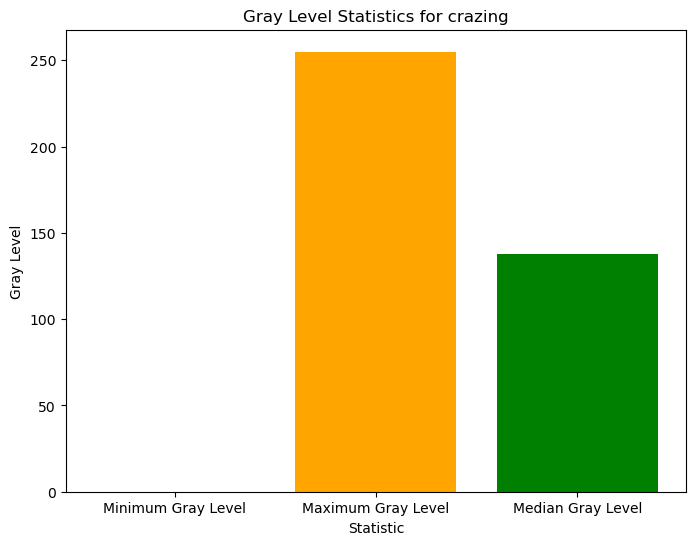

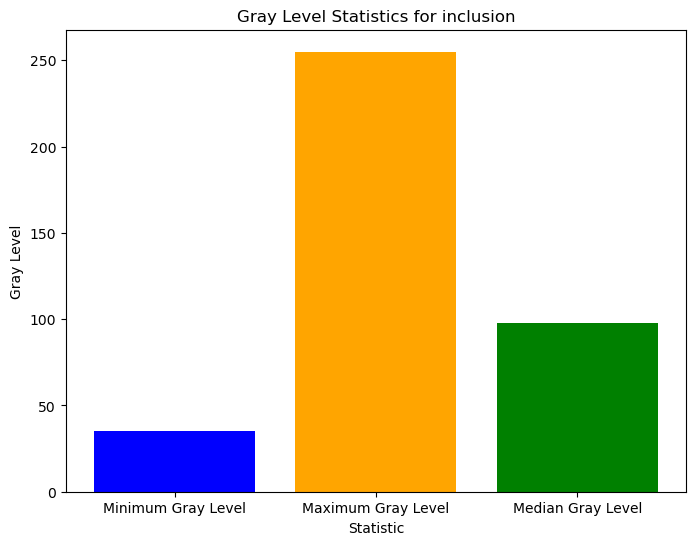

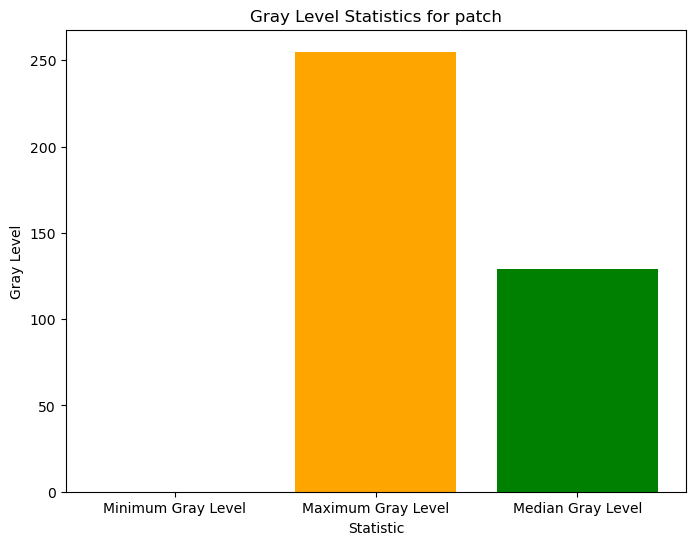

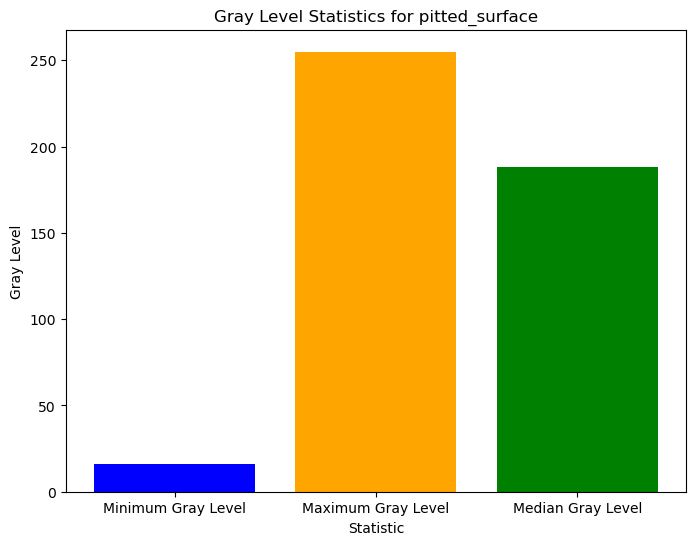

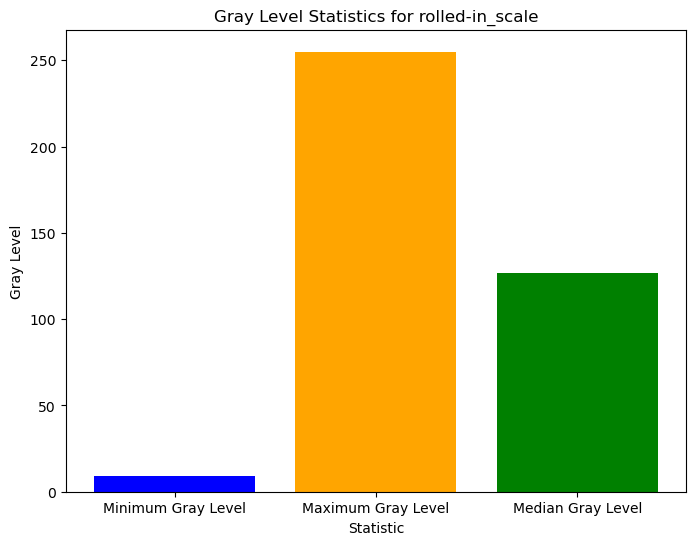

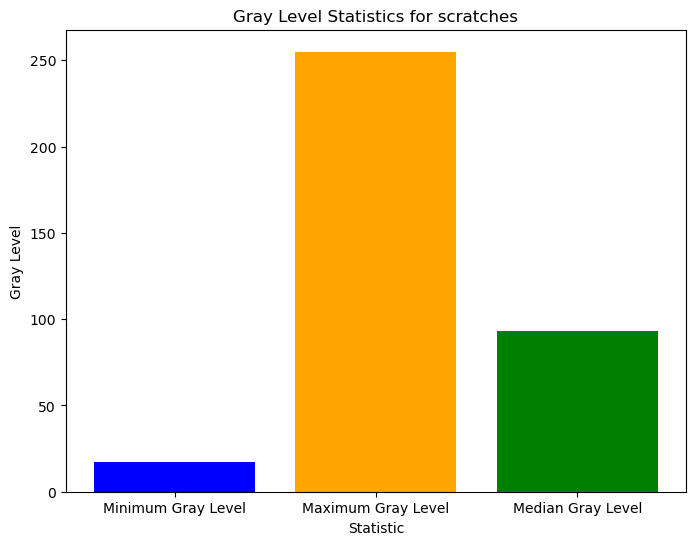

In [20]:
import matplotlib.pyplot as plt

for folder_name, folder_path in folders.items():
    min_level, max_level, median_level = calculate_gray_level_stats(folder_path)
    
    # Plot bar chart
    labels = ['Minimum Gray Level', 'Maximum Gray Level', 'Median Gray Level']
    values = [min_level, max_level, median_level]
    
    plt.figure(figsize=(8, 6))
    plt.bar(labels, values, color=['blue', 'orange', 'green'])
    plt.title(f"Gray Level Statistics for {folder_name}")
    plt.xlabel('Statistic')
    plt.ylabel('Gray Level')
    plt.show()

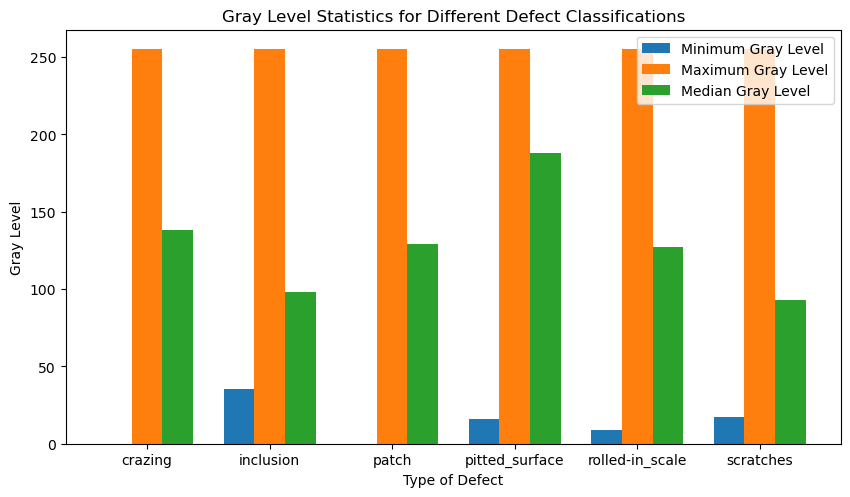

In [32]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the folders containing the images
folders = {
    "crazing": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/crazing",
    "inclusion": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/inclusion",
    "patch": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/patches",
    "pitted_surface": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/pitted_surface",
    "rolled-in_scale": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/rolled-in_scale",
    "scratches": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/scratches"
}

# Initialize lists to store statistics
min_levels = []
max_levels = []
median_levels = []

# Function to calculate min, max, median of gray levels of images in a folder
def calculate_gray_level_stats(folder_path):
    gray_levels = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        gray_levels.extend(img.flatten())
    min_gray_level = np.min(gray_levels)
    max_gray_level = np.max(gray_levels)
    median_gray_level = np.median(gray_levels)
    return min_gray_level, max_gray_level, median_gray_level

# Calculate gray level stats for each folder
for folder_name, folder_path in folders.items():
    min_level, max_level, median_level = calculate_gray_level_stats(folder_path)
    min_levels.append(min_level)
    max_levels.append(max_level)
    median_levels.append(median_level)

# Plot all statistics in one bar chart
labels = list(folders.keys())
x = np.arange(len(labels))
bar_width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, min_levels, width=bar_width, label='Minimum Gray Level')
plt.bar(x, max_levels, width=bar_width, label='Maximum Gray Level')
plt.bar(x + bar_width, median_levels, width=bar_width, label='Median Gray Level')

plt.xlabel('Type of Defect')
plt.ylabel('Gray Level')
plt.title('Gray Level Statistics for Different Defect Classifications')
plt.xticks(x, labels)
plt.legend(loc='upper right')

# Adjust subplot parameters to add extra space at the top
plt.subplots_adjust(top=0.8)

plt.show()


In [39]:
import os
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from scipy.fft import fft2, fftshift

# Define the folders containing the images
folders = {
    "crazing": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/crazing",
    "inclusion": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/inclusion",
    "patch": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/patches",
    "pitted_surface": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/pitted_surface",
    "rolled-in_scale": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/rolled-in_scale",
    "scratches": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/scratches"
}

# Function to compute Fourier Transform of images
def compute_fourier_transform(img):
    f_transform = fftshift(fft2(img))
    return f_transform

# Function to compute Haralick Texture Features
def compute_haralick_features(img):
    glcm = graycomatrix(img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast').ravel()[0]
    energy = graycoprops(glcm, 'energy').ravel()[0]
    homogeneity = graycoprops(glcm, 'homogeneity').ravel()[0]
    correlation = graycoprops(glcm, 'correlation').ravel()[0]
    return contrast, energy, homogeneity, correlation

# Iterate over each folder containing images
for folder_name, folder_path in folders.items():
    print(f"Folder: {folder_name}")
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # Compute Fourier Transform
        f_transform = compute_fourier_transform(img)
        
        # Compute Haralick Texture Features
        contrast, energy, homogeneity, correlation = compute_haralick_features(img)
        
        # Print the computed features
        print(f"Image: {img_name}")
        print(f"Fourier Transform: Min={np.min(f_transform)}, Max={np.max(f_transform)}, Median={np.median(f_transform)}")
        print(f"Haralick Texture Features: Contrast={contrast}, Energy={energy}, Homogeneity={homogeneity}, Correlation={correlation}")
        print()


Folder: crazing
Image: crazing_1.jpg
Fourier Transform: Min=(-84709.40524515382-186510.8783882846j), Max=(6425460-0j), Median=(18.89010867418733+0j)
Haralick Texture Features: Contrast=343.5983165829146, Energy=0.013331993074647198, Homogeneity=0.06581209963933826, Correlation=0.7864375768990273

Image: crazing_10.jpg
Fourier Transform: Min=(-161835.10125819454-267110.6166420041j), Max=(5479663-0j), Median=(1.0985816845719114-442.6833479113957j)
Haralick Texture Features: Contrast=260.89992462311557, Energy=0.01269642517172088, Homogeneity=0.07984299856402996, Correlation=0.8973864027457568

Image: crazing_100.jpg
Fourier Transform: Min=(-327467.31777731166-192410.03640421422j), Max=(5539948-0j), Median=(-2.4647220276776807+0j)
Haralick Texture Features: Contrast=296.359648241206, Energy=0.013818752850937529, Homogeneity=0.07339889649165879, Correlation=0.8088291307918071

Image: crazing_101.jpg
Fourier Transform: Min=(-60257.5360540063-12720.964169048139j), Max=(6058474-0j), Median=(1

Image: crazing_127.jpg
Fourier Transform: Min=(-178236.128618491-166353.2969251125j), Max=(4872206-0j), Median=(27.214753670727788+2281.803701004319j)
Haralick Texture Features: Contrast=230.33351758793972, Energy=0.014609078206073127, Homogeneity=0.0831507584284176, Correlation=0.8678677680081993

Image: crazing_128.jpg
Fourier Transform: Min=(-145898.44227786048-296858.34006980027j), Max=(5271316-0j), Median=(4.3664769634438585-100.17530237672543j)
Haralick Texture Features: Contrast=257.95319095477385, Energy=0.015247375181916817, Homogeneity=0.07829315777051643, Correlation=0.7882496416225613

Image: crazing_129.jpg
Fourier Transform: Min=(-72942.83514483688-354629.5581050723j), Max=(4877892-0j), Median=(15.639767992281236+0j)
Haralick Texture Features: Contrast=218.04650753768846, Energy=0.016023759772618114, Homogeneity=0.08342538491835017, Correlation=0.8093426585245045

Image: crazing_13.jpg
Fourier Transform: Min=(-60207.252717172174-52502.57122512614j), Max=(6709273-0j), Medi

Image: crazing_158.jpg
Fourier Transform: Min=(-89990.53354306397-118522.37611658464j), Max=(6209009-0j), Median=(23.106088110280318-87.60289726633448j)
Haralick Texture Features: Contrast=314.2127638190956, Energy=0.014712959422574683, Homogeneity=0.06858146585744707, Correlation=0.7480622224700442

Image: crazing_159.jpg
Fourier Transform: Min=(-153616.99716476141-32392.420867917346j), Max=(5878340-0j), Median=(8.636950332026117+769.3482627901659j)
Haralick Texture Features: Contrast=322.72502512562824, Energy=0.014788219878865649, Homogeneity=0.06978560713516935, Correlation=0.7277393703894337

Image: crazing_16.jpg
Fourier Transform: Min=(-265265.4832438541-383316.6040676957j), Max=(6085300-0j), Median=(21.65232194130425-668.7686971219862j)
Haralick Texture Features: Contrast=322.6156030150754, Energy=0.012921353537379455, Homogeneity=0.07115732491631091, Correlation=0.8369652276724342

Image: crazing_160.jpg
Fourier Transform: Min=(-127691.62507504693-36166.96546945843j), Max=(589

Image: crazing_191.jpg
Fourier Transform: Min=(-224040.5497836306-188260.87182881986j), Max=(6784808-0j), Median=(19.07235458407206+0j)
Haralick Texture Features: Contrast=422.2556532663317, Energy=0.012642373704671264, Homogeneity=0.06070599553527845, Correlation=0.7580764573454054

Image: crazing_192.jpg
Fourier Transform: Min=(-143190.40689828925-252991.33048361904j), Max=(6665524-0j), Median=(-1.9140594818436512+238.96745505715455j)
Haralick Texture Features: Contrast=408.35050251256285, Energy=0.012534717324518963, Homogeneity=0.06367468629311877, Correlation=0.7824200233403601

Image: crazing_193.jpg
Fourier Transform: Min=(-67448.50334489431-416200.01434715884j), Max=(4171106-0j), Median=(10.791603254810951+639.498847551471j)
Haralick Texture Features: Contrast=210.15180904522614, Energy=0.015518111517060732, Homogeneity=0.08703407351284673, Correlation=0.868057816243757

Image: crazing_194.jpg
Fourier Transform: Min=(-58349.213602655-12320.528266861349j), Max=(4202466-0j), Medi

Image: crazing_223.jpg
Fourier Transform: Min=(-58032.517255721905-6675.973700734695j), Max=(3195416-0j), Median=(6.268577407041903+0j)
Haralick Texture Features: Contrast=139.9818592964824, Energy=0.018036561271104336, Homogeneity=0.10668976239882075, Correlation=0.8853858092856411

Image: crazing_224.jpg
Fourier Transform: Min=(-68797.31328955515-1240.5468777835608j), Max=(6288122-0j), Median=(-16.192565192173902+0j)
Haralick Texture Features: Contrast=387.72914572864323, Energy=0.013225737820837547, Homogeneity=0.06308895741435187, Correlation=0.7558400672622788

Image: crazing_225.jpg
Fourier Transform: Min=(-228549.16473223333-27568.632549726855j), Max=(6448995-0j), Median=(2.5593008462482203+0j)
Haralick Texture Features: Contrast=373.6352512562814, Energy=0.013072173988458294, Homogeneity=0.06427201296436658, Correlation=0.7732413553737024

Image: crazing_226.jpg
Fourier Transform: Min=(-148752.4972637423-94733.19116007042j), Max=(6355258-0j), Median=(45.53287518115167+0j)
Haral

Image: crazing_37.jpg
Fourier Transform: Min=(-66235.6145425488-63567.7227757559j), Max=(4336898-0j), Median=(27.658044176679624+698.3728345170825j)
Haralick Texture Features: Contrast=199.29821608040206, Energy=0.013317542868595064, Homogeneity=0.09240563977301443, Correlation=0.9315422035150064

Image: crazing_38.jpg
Fourier Transform: Min=(-88532.81874851981-17852.993306545064j), Max=(4635301-0j), Median=(-30.244664251013887+0j)
Haralick Texture Features: Contrast=215.98783919597992, Energy=0.012913204080524012, Homogeneity=0.08703504235011499, Correlation=0.9308564939318886

Image: crazing_39.jpg
Fourier Transform: Min=(-55537.0936608733-24696.460764211748j), Max=(4446754-0j), Median=(-30.02919560406849+0j)
Haralick Texture Features: Contrast=203.8521859296483, Energy=0.013660580119666522, Homogeneity=0.08937286912285873, Correlation=0.9273007167257759

Image: crazing_4.jpg
Fourier Transform: Min=(-94562.68133258083-223618.9167179386j), Max=(6523791-0j), Median=(4.39612088779694-99

Image: crazing_69.jpg
Fourier Transform: Min=(-60046.845829320126-45395.80743954707j), Max=(6227956-0j), Median=(-13.377359796575092+0j)
Haralick Texture Features: Contrast=350.1224371859297, Energy=0.013634757273006021, Homogeneity=0.06498461667508013, Correlation=0.7808517532967855

Image: crazing_7.jpg
Fourier Transform: Min=(-217526.22143845155-67336.04487323789j), Max=(6917455-0j), Median=(10.111077514098838+0j)
Haralick Texture Features: Contrast=414.3220100502512, Energy=0.012728567333084655, Homogeneity=0.06103598631564279, Correlation=0.7521143059192545

Image: crazing_70.jpg
Fourier Transform: Min=(-108071.82120640684-3197.698485248281j), Max=(6132762-0j), Median=(-53.15003352738847-186.01159383955394j)
Haralick Texture Features: Contrast=350.6035427135679, Energy=0.013961938760290865, Homogeneity=0.06572554728155645, Correlation=0.7519944536871278

Image: crazing_71.jpg
Fourier Transform: Min=(-51428.64087762464-73894.28108210539j), Max=(6640451-0j), Median=(19.9553561776244

Image: crazing_96.jpg
Fourier Transform: Min=(-64548.34664308967-14910.620508420185j), Max=(6076884-0j), Median=(16.74605140828872-541.545722396948j)
Haralick Texture Features: Contrast=345.1018592964824, Energy=0.014583160026194156, Homogeneity=0.06669863744166332, Correlation=0.7133022931239782

Image: crazing_97.jpg
Fourier Transform: Min=(-259028.70119923854-16246.88920104974j), Max=(6238181-0j), Median=(-32.14473130604529+0j)
Haralick Texture Features: Contrast=369.3339949748744, Energy=0.013183929691907438, Homogeneity=0.06443324169039737, Correlation=0.789586035434229

Image: crazing_98.jpg
Fourier Transform: Min=(-392417.8783114157-333632.9461851056j), Max=(5945188-0j), Median=(-9.053893093165485-326.0336843842932j)
Haralick Texture Features: Contrast=341.3706532663317, Energy=0.012671489744985146, Homogeneity=0.06755830489184361, Correlation=0.833865183848247

Image: crazing_99.jpg
Fourier Transform: Min=(-33225.32943613235-20495.57009869267j), Max=(3746273-0j), Median=(49.764

Image: inclusion_129.jpg
Fourier Transform: Min=(-21588.95492524233-49965.72833425194j), Max=(2883153-0j), Median=(5.844518660015233+0j)
Haralick Texture Features: Contrast=2.6931407035175883, Energy=0.07607515349354338, Homogeneity=0.5517294292702143, Correlation=0.9854025401042887

Image: inclusion_13.jpg
Fourier Transform: Min=(-55274.64052843237-18524.733624139168j), Max=(3907497-0j), Median=(-1.1957994863982613-7.7783974220971j)
Haralick Texture Features: Contrast=6.4026130653266335, Energy=0.0596021632848645, Homogeneity=0.41238272044406205, Correlation=0.9691097343239532

Image: inclusion_130.jpg
Fourier Transform: Min=(-82526.22988951686-59508.355144466426j), Max=(4930999-0j), Median=(4.5830160598385845+0j)
Haralick Texture Features: Contrast=13.565603015075379, Energy=0.05271815743776752, Homogeneity=0.31333956435913024, Correlation=0.929598999745541

Image: inclusion_131.jpg
Fourier Transform: Min=(-17666.60804827179-50754.547324439205j), Max=(2863147-0j), Median=(0.599095019

Image: inclusion_161.jpg
Fourier Transform: Min=(-40343.1966768026-55174.067981102184j), Max=(3613012-0j), Median=(-2.4975191887819506+0j)
Haralick Texture Features: Contrast=8.223919597989951, Energy=0.05472993374134613, Homogeneity=0.3697582705001554, Correlation=0.966467130869839

Image: inclusion_162.jpg
Fourier Transform: Min=(-72499.40926306428-15674.802857770006j), Max=(4733371-0j), Median=(-2.331772515766346+0j)
Haralick Texture Features: Contrast=15.421909547738695, Energy=0.039935848218486315, Homogeneity=0.2946339968604131, Correlation=0.9622330035137396

Image: inclusion_163.jpg
Fourier Transform: Min=(-114926.12084505455-117721.49931534131j), Max=(4535668-0j), Median=(2.443510196456529+0j)
Haralick Texture Features: Contrast=14.373994974874373, Energy=0.045756904266165445, Homogeneity=0.3126444437441825, Correlation=0.9654137682793842

Image: inclusion_164.jpg
Fourier Transform: Min=(-164070.20266852697-77288.6141177383j), Max=(4715906-0j), Median=(3.1449811664515472+1.673

Image: inclusion_197.jpg
Fourier Transform: Min=(-52231.96254767367-83802.09809601451j), Max=(3281374-0j), Median=(2.618157974682738+0j)
Haralick Texture Features: Contrast=4.679321608040201, Energy=0.0650388884140574, Homogeneity=0.4558715147891267, Correlation=0.9745744393999979

Image: inclusion_198.jpg
Fourier Transform: Min=(-71685.52222801934-90748.11772381295j), Max=(3649564-0j), Median=(-2.0046024400857476+42.81658650998065j)
Haralick Texture Features: Contrast=7.938115577889448, Energy=0.05413663076919943, Homogeneity=0.3814982504354003, Correlation=0.9647792043089151

Image: inclusion_199.jpg
Fourier Transform: Min=(-53774.51820259988-64192.97113347862j), Max=(3991261-0j), Median=(1.2926164974721814+0j)
Haralick Texture Features: Contrast=10.732386934673368, Energy=0.04971686329401284, Homogeneity=0.335452606877664, Correlation=0.9535893067604769

Image: inclusion_2.jpg
Fourier Transform: Min=(-34956.172266105525-47793.10794905295j), Max=(4521219-0j), Median=(2.17163466143141

Image: inclusion_226.jpg
Fourier Transform: Min=(-33751.75924380939-235287.6600605612j), Max=(3518478-0j), Median=(-0.12306398460267154-57.40727779790246j)
Haralick Texture Features: Contrast=5.04211055276382, Energy=0.05952171419953376, Homogeneity=0.4376949638243572, Correlation=0.9786922464945266

Image: inclusion_227.jpg
Fourier Transform: Min=(-95034.36661590388-741187.134480367j), Max=(5480733-0j), Median=(-9.484304462493458-210.50888753130036j)
Haralick Texture Features: Contrast=6.231683417085428, Energy=0.032291276057653404, Homogeneity=0.42311362118203594, Correlation=0.997533596688206

Image: inclusion_228.jpg
Fourier Transform: Min=(-57999.81023285027-23578.460478739245j), Max=(5491925-0j), Median=(-2.749069499733082+0j)
Haralick Texture Features: Contrast=5.688190954773869, Energy=0.04075305627393823, Homogeneity=0.4357566328232073, Correlation=0.9974218515781682

Image: inclusion_229.jpg
Fourier Transform: Min=(-37856.68322884134-28236.692570207873j), Max=(7881406-0j), Me

Image: inclusion_4.jpg
Fourier Transform: Min=(-53038.3471428344-122485.19488192652j), Max=(4359474-0j), Median=(3.2263601558494983+0j)
Haralick Texture Features: Contrast=8.108668341708542, Energy=0.058096260642305296, Homogeneity=0.4153503163099251, Correlation=0.9725252554164938

Image: inclusion_40.jpg
Fourier Transform: Min=(-77598.29610865448-109567.87103700486j), Max=(4628653-0j), Median=(-5.094893416066668+0j)
Haralick Texture Features: Contrast=10.43530150753769, Energy=0.0545070723284126, Homogeneity=0.3234929220905805, Correlation=0.9514026756289476

Image: inclusion_41.jpg
Fourier Transform: Min=(-61998.539543202634-109390.1321167897j), Max=(3153141-0j), Median=(-2.1143151872855555+0j)
Haralick Texture Features: Contrast=3.697160804020101, Energy=0.058304936385602184, Homogeneity=0.4811496081468944, Correlation=0.9929774400503611

Image: inclusion_42.jpg
Fourier Transform: Min=(-94093.1035325141-116942.95484396376j), Max=(3908817-0j), Median=(0.1925386293624456+0j)
Haralick

Image: inclusion_70.jpg
Fourier Transform: Min=(-50056.49468699352-26524.835036431396j), Max=(3988643-0j), Median=(1.6315445744421595+0j)
Haralick Texture Features: Contrast=7.261281407035177, Energy=0.05682027897169862, Homogeneity=0.3914685304613705, Correlation=0.9726443077652107

Image: inclusion_71.jpg
Fourier Transform: Min=(-52801.43778407473-59478.57080492595j), Max=(3656234-0j), Median=(7.097205364698823+0j)
Haralick Texture Features: Contrast=5.8498241206030155, Energy=0.05464165905026179, Homogeneity=0.43845540068969874, Correlation=0.9848380537580438

Image: inclusion_72.jpg
Fourier Transform: Min=(-38870.658568849205-58031.354463011514j), Max=(4677878-0j), Median=(2.602387956806723+0j)
Haralick Texture Features: Contrast=15.237412060301509, Energy=0.042881884594347885, Homogeneity=0.29235306143211665, Correlation=0.9658470354076109

Image: inclusion_73.jpg
Fourier Transform: Min=(-30278.316769694185-137983.07336335175j), Max=(2990495-0j), Median=(5.593112100004937+265.2083

Image: patches_102.jpg
Fourier Transform: Min=(-326643.161397759-96018.73932274434j), Max=(7145854-0j), Median=(-6.080037433031578-160.68593750165655j)
Haralick Texture Features: Contrast=361.92773869346735, Energy=0.019090501202978002, Homogeneity=0.0857344026848584, Correlation=0.9342157230066128

Image: patches_103.jpg
Fourier Transform: Min=(-384319.63805924467-88352.10311630284j), Max=(6075405-0j), Median=(3.217849109147039+0j)
Haralick Texture Features: Contrast=305.8292713567839, Energy=0.011653078348405017, Homogeneity=0.07784243131070821, Correlation=0.929886821662413

Image: patches_104.jpg
Fourier Transform: Min=(-594135.8146542085-656638.2160581448j), Max=(6543876-0j), Median=(32.884030127384904+0j)
Haralick Texture Features: Contrast=349.7062060301508, Energy=0.017864259765669806, Homogeneity=0.08593688020007714, Correlation=0.9466070046808668

Image: patches_105.jpg
Fourier Transform: Min=(-239747.63824973287-24439.410923721298j), Max=(4653505-0j), Median=(-1.005434195173

Image: patches_130.jpg
Fourier Transform: Min=(-408043.20367504016-795595.5422158577j), Max=(4764435-0j), Median=(7.279955578869817+0j)
Haralick Texture Features: Contrast=237.10768844221104, Energy=0.013315148780270212, Homogeneity=0.1024131708857253, Correlation=0.9715028162685271

Image: patches_131.jpg
Fourier Transform: Min=(-200415.3520232138-215382.21577984342j), Max=(3081336-0j), Median=(-8.563913362154494+0j)
Haralick Texture Features: Contrast=139.1831407035176, Energy=0.015061970588409438, Homogeneity=0.11698008672574173, Correlation=0.9468255845720998

Image: patches_132.jpg
Fourier Transform: Min=(-321443.81865645177-1038753.4349414587j), Max=(4234397-0j), Median=(41.52590342424105+418.50846119601704j)
Haralick Texture Features: Contrast=215.7675628140704, Energy=0.012413242777274982, Homogeneity=0.1030032556333136, Correlation=0.9693939004199177

Image: patches_133.jpg
Fourier Transform: Min=(-227870.29436157132-126027.88801395363j), Max=(2519629-0j), Median=(-20.04442582

Image: patches_160.jpg
Fourier Transform: Min=(-206810.24261942983-61591.91249953907j), Max=(5585248-0j), Median=(1.1277532097453786+452.8501260748525j)
Haralick Texture Features: Contrast=280.3711557788945, Energy=0.027144337209617602, Homogeneity=0.1049308336569301, Correlation=0.9529385816968379

Image: patches_161.jpg
Fourier Transform: Min=(-332503.42988131254-654340.353713427j), Max=(8027551-0j), Median=(12.958875481061114+0j)
Haralick Texture Features: Contrast=214.79047738693467, Energy=0.34721111482224276, Homogeneity=0.4155088282613941, Correlation=0.9729172018726515

Image: patches_162.jpg
Fourier Transform: Min=(-87545.84561286052-54115.830071832854j), Max=(1697873-0j), Median=(-0.3157247593435102-351.8576413577555j)
Haralick Texture Features: Contrast=77.17841708542713, Energy=0.027541035265937413, Homogeneity=0.1615686058744972, Correlation=0.9265483559309065

Image: patches_163.jpg
Fourier Transform: Min=(-304480.18545234564-45397.39040798917j), Max=(6126673-0j), Median=

Image: patches_19.jpg
Fourier Transform: Min=(-158926.8382637195-60373.32669319138j), Max=(4518704-0j), Median=(1.6505702041223458+454.982739539684j)
Haralick Texture Features: Contrast=227.83477386934675, Energy=0.01437295740261416, Homogeneity=0.10238514916241505, Correlation=0.9690990503626827

Image: patches_190.jpg
Fourier Transform: Min=(-513577.8308984447-11309.028694893075j), Max=(5387318-0j), Median=(-16.37126735127913+0j)
Haralick Texture Features: Contrast=337.0729145728643, Energy=0.011885643801347523, Homogeneity=0.08251675255150857, Correlation=0.9519879750376399

Image: patches_191.jpg
Fourier Transform: Min=(-471577.82198644674-273752.8812596138j), Max=(5310367-0j), Median=(25.18324472142973+0j)
Haralick Texture Features: Contrast=285.40989949748746, Energy=0.028684406819137708, Homogeneity=0.11189907567137519, Correlation=0.9652867937226752

Image: patches_192.jpg
Fourier Transform: Min=(-141559.8468308448-268555.33567056706j), Max=(1852494-0j), Median=(18.394905527035

Image: patches_216.jpg
Fourier Transform: Min=(-352050.1030119556-189864.3870315455j), Max=(5530373-0j), Median=(41.53076857358246+0j)
Haralick Texture Features: Contrast=292.2860552763819, Energy=0.021759584571383106, Homogeneity=0.1001989635786819, Correlation=0.9550587132389223

Image: patches_217.jpg
Fourier Transform: Min=(-173049.8033763379-14768.012798653108j), Max=(6156685-0j), Median=(-31.94143832490056-1711.8304898241208j)
Haralick Texture Features: Contrast=335.8069095477387, Energy=0.036615915901981426, Homogeneity=0.1122582890219691, Correlation=0.9532921233713756

Image: patches_218.jpg
Fourier Transform: Min=(-131258.6977555881-31963.73630229505j), Max=(1422699-0j), Median=(-12.833267570102606-34.70349422085425j)
Haralick Texture Features: Contrast=61.82015075376884, Energy=0.0366736365773505, Homogeneity=0.19758473999243792, Correlation=0.959199733110577

Image: patches_219.jpg
Fourier Transform: Min=(-81454.04531117508-5075.804027448801j), Max=(1765089-0j), Median=(-16

Image: patches_3.jpg
Fourier Transform: Min=(-358174.8349768367-86946.2513776632j), Max=(5791862-0j), Median=(61.273438308327286+0j)
Haralick Texture Features: Contrast=365.1982914572864, Energy=0.020874596561285305, Homogeneity=0.09370496563572248, Correlation=0.9525935530984226

Image: patches_30.jpg
Fourier Transform: Min=(-208469.95870953138-77796.76921773392j), Max=(1481358-0j), Median=(15.801428430302714-306.32871311256315j)
Haralick Texture Features: Contrast=62.6017336683417, Energy=0.06852622058750485, Homogeneity=0.2289236558212522, Correlation=0.9678276219503709

Image: patches_31.jpg
Fourier Transform: Min=(-392308.68623175554-30202.31953578574j), Max=(4089672-0j), Median=(-12.15684237174412-1561.245770005213j)
Haralick Texture Features: Contrast=182.82856783919596, Energy=0.013364980318793756, Homogeneity=0.10939078879419155, Correlation=0.9720630115972024

Image: patches_32.jpg
Fourier Transform: Min=(-164862.19829345215-115998.26311708403j), Max=(1940820-0j), Median=(-9.

Image: patches_6.jpg
Fourier Transform: Min=(-456535.0824882795-147814.17503668257j), Max=(3840154-0j), Median=(-7.420745325259304+0j)
Haralick Texture Features: Contrast=199.26178391959797, Energy=0.014476734142008636, Homogeneity=0.10609170089452823, Correlation=0.9671618268380988

Image: patches_60.jpg
Fourier Transform: Min=(-718567.2051545542-700721.8725974006j), Max=(7514691-0j), Median=(-6.156538824031031+0j)
Haralick Texture Features: Contrast=373.4170854271357, Energy=0.03261507357290578, Homogeneity=0.09975014770961091, Correlation=0.9453361241854599

Image: patches_61.jpg
Fourier Transform: Min=(-436763.4088832684-35952.62661712032j), Max=(7771965-0j), Median=(-47.56537688601378+2137.2410387223395j)
Haralick Texture Features: Contrast=391.5775376884422, Energy=0.01901450698737227, Homogeneity=0.07973262595967226, Correlation=0.8997949747334772

Image: patches_62.jpg
Fourier Transform: Min=(-355664.30732338724-51358.81569796101j), Max=(7596526-0j), Median=(-22.629746675129127

Image: patches_87.jpg
Fourier Transform: Min=(-403140.9890015122-47003.13814579038j), Max=(6119020-0j), Median=(-26.728761167847168+1339.4182634695644j)
Haralick Texture Features: Contrast=297.791608040201, Energy=0.01077129260700153, Homogeneity=0.08000295395259036, Correlation=0.9599254246204221

Image: patches_88.jpg
Fourier Transform: Min=(-272709.0669448527-3015.008073356724j), Max=(4544440-0j), Median=(82.25797967567371+0j)
Haralick Texture Features: Contrast=197.2497487437186, Energy=0.012027436375933436, Homogeneity=0.09995278608281954, Correlation=0.9627890673568134

Image: patches_89.jpg
Fourier Transform: Min=(-423683.0340908633-314211.99002026476j), Max=(4971586-0j), Median=(-69.40139114506519+0j)
Haralick Texture Features: Contrast=229.38394472361813, Energy=0.011097068676400871, Homogeneity=0.09428581409750846, Correlation=0.9675143817171266

Image: patches_9.jpg
Fourier Transform: Min=(-362037.12394079973-48644.70301051408j), Max=(6094351-0j), Median=(-5.187989411589911-

Image: pitted_surface_113.jpg
Fourier Transform: Min=(-65242.69953078528-4496.71703068317j), Max=(8112471-0j), Median=(12.42515808681668+0j)
Haralick Texture Features: Contrast=65.83545226130653, Energy=0.023848820849313043, Homogeneity=0.17164966359293676, Correlation=0.9519383901761904

Image: pitted_surface_114.jpg
Fourier Transform: Min=(-263737.9889134787-423607.911942204j), Max=(9259749-0j), Median=(18.852407288633344+0j)
Haralick Texture Features: Contrast=57.51296482412059, Energy=0.12085011981084877, Homogeneity=0.27004066834452656, Correlation=0.9574173733619962

Image: pitted_surface_115.jpg
Fourier Transform: Min=(-78036.04566620565-42343.734460350046j), Max=(9696103-0j), Median=(-4.080921145296543+193.57534701544677j)
Haralick Texture Features: Contrast=49.56261306532663, Energy=0.13008442922113989, Homogeneity=0.28827468563598163, Correlation=0.8365777732494476

Image: pitted_surface_116.jpg
Fourier Transform: Min=(-189052.6368120329-300826.82514132385j), Max=(8624052-0j)

Image: pitted_surface_14.jpg
Fourier Transform: Min=(-126810.44845179317-99044.52575586081j), Max=(8465418-0j), Median=(-4.0470239152968475-320.3613777138281j)
Haralick Texture Features: Contrast=60.63414572864322, Energy=0.026082435218622958, Homogeneity=0.1539355841734718, Correlation=0.877598653121659

Image: pitted_surface_140.jpg
Fourier Transform: Min=(-116909.09461675916-46557.122223302824j), Max=(8877310-0j), Median=(1.6064444061231598+0j)
Haralick Texture Features: Contrast=108.74974874371858, Energy=0.024167164805809195, Homogeneity=0.13693930896801468, Correlation=0.8646403124749189

Image: pitted_surface_141.jpg
Fourier Transform: Min=(-138766.6966185678-136953.42165064477j), Max=(8619470-0j), Median=(7.203522815984627+0j)
Haralick Texture Features: Contrast=70.3736934673367, Energy=0.027422479354171303, Homogeneity=0.1493254991036243, Correlation=0.8192772533363559

Image: pitted_surface_142.jpg
Fourier Transform: Min=(-43244.19893859105-241736.8548802043j), Max=(7057276-0

Image: pitted_surface_168.jpg
Fourier Transform: Min=(-123336.19223560976-306522.86967862875j), Max=(9621099-0j), Median=(8.595057617871902-355.73174150821507j)
Haralick Texture Features: Contrast=90.06092964824123, Energy=0.2824613555441237, Homogeneity=0.40068035285881803, Correlation=0.8871391297400278

Image: pitted_surface_169.jpg
Fourier Transform: Min=(-164853.07768879575-361198.76857795555j), Max=(8235539-0j), Median=(-1.1005084853266993-45.38455380997089j)
Haralick Texture Features: Contrast=157.52213567839198, Energy=0.020735867478742172, Homogeneity=0.11529275299467227, Correlation=0.919790211570525

Image: pitted_surface_17.jpg
Fourier Transform: Min=(-150750.30623746442-82783.78090872639j), Max=(9089373-0j), Median=(-3.6128701846482443+0j)
Haralick Texture Features: Contrast=125.04969849246231, Energy=0.02465044376207517, Homogeneity=0.11879355396723629, Correlation=0.8065757991378304

Image: pitted_surface_170.jpg
Fourier Transform: Min=(-110375.88434990947-100788.9966496

Image: pitted_surface_2.jpg
Fourier Transform: Min=(-54156.54309163167-52484.81837641534j), Max=(5084450-0j), Median=(6.329183398739097+257.45355130176625j)
Haralick Texture Features: Contrast=32.01293969849246, Energy=0.02620758389473659, Homogeneity=0.2523107181072017, Correlation=0.9833057207917899

Image: pitted_surface_20.jpg
Fourier Transform: Min=(-46801.4881987307-63578.55470615903j), Max=(7278000-0j), Median=(4.079535169061529+74.54289603973591j)
Haralick Texture Features: Contrast=108.21120603015076, Energy=0.019918507112298534, Homogeneity=0.12459205942514968, Correlation=0.9007614927877946

Image: pitted_surface_200.jpg
Fourier Transform: Min=(-27956.31743087244-15808.077973745556j), Max=(2989962-0j), Median=(0.1259744727743346+0j)
Haralick Texture Features: Contrast=9.509924623115579, Energy=0.035699618570676155, Homogeneity=0.38255226429170375, Correlation=0.9937828956846205

Image: pitted_surface_201.jpg
Fourier Transform: Min=(-270955.3803794607-573197.5738387166j), Max

Image: pitted_surface_231.jpg
Fourier Transform: Min=(-197646.6276031123-222476.81199591915j), Max=(8531575-0j), Median=(1.8984207272505955+0j)
Haralick Texture Features: Contrast=92.55595477386936, Energy=0.07001304183593603, Homogeneity=0.19060974871504083, Correlation=0.9551564781999013

Image: pitted_surface_232.jpg
Fourier Transform: Min=(-147805.57213038125-347332.9676172889j), Max=(8903948-0j), Median=(2.496403179862803+157.39956150159946j)
Haralick Texture Features: Contrast=29.59552763819095, Energy=0.08294077361272066, Homogeneity=0.3115192230348732, Correlation=0.9705068807121161

Image: pitted_surface_233.jpg
Fourier Transform: Min=(-177111.03943500022-1032104.6290709286j), Max=(8218917-0j), Median=(-2.6676169098454956+163.5582971846427j)
Haralick Texture Features: Contrast=13.808391959798996, Energy=0.19617210327588436, Homogeneity=0.4561645509191422, Correlation=0.9964559060577676

Image: pitted_surface_234.jpg
Fourier Transform: Min=(-96605.69620798428-33044.33226150224j

Fourier Transform: Min=(-137184.87180220132-633686.3234463127j), Max=(6218271-0j), Median=(4.4881893778855755+128.46639207772176j)
Haralick Texture Features: Contrast=26.203718592964822, Energy=0.02358013094084711, Homogeneity=0.25888168665121825, Correlation=0.9885615746789658

Image: pitted_surface_48.jpg
Fourier Transform: Min=(-178012.354936518-543520.5563766265j), Max=(7837178-0j), Median=(2.1149290315951674+0j)
Haralick Texture Features: Contrast=44.543542713567845, Energy=0.021169441392189643, Homogeneity=0.19342908124307823, Correlation=0.9729522282895661

Image: pitted_surface_49.jpg
Fourier Transform: Min=(-153428.68139744663-758923.7928514571j), Max=(7262294-0j), Median=(-2.9643348581992512+0j)
Haralick Texture Features: Contrast=26.00690954773869, Energy=0.022718181147544807, Homogeneity=0.24184978913831004, Correlation=0.989587112756927

Image: pitted_surface_5.jpg
Fourier Transform: Min=(-169419.059033339-351900.1918853648j), Max=(6179607-0j), Median=(9.374967618731489+54

Image: pitted_surface_8.jpg
Fourier Transform: Min=(-179788.87591566626-495456.0451254509j), Max=(7516766-0j), Median=(11.896118636335643+0j)
Haralick Texture Features: Contrast=83.66776381909547, Energy=0.017465980598602264, Homogeneity=0.13404346245172544, Correlation=0.9519113886364431

Image: pitted_surface_80.jpg
Fourier Transform: Min=(-176851.91399510513-250776.85685043922j), Max=(8723075-0j), Median=(0.9948631464993198+604.4110862334937j)
Haralick Texture Features: Contrast=55.3498743718593, Energy=0.028177341771866142, Homogeneity=0.1674956635575779, Correlation=0.9267456800849757

Image: pitted_surface_81.jpg
Fourier Transform: Min=(-32543.852432663254-274269.28777819325j), Max=(4504192-0j), Median=(7.4479485601831925+57.90937840277374j)
Haralick Texture Features: Contrast=13.506005025125628, Energy=0.028805450586395373, Homogeneity=0.29152329384999054, Correlation=0.992268658962801

Image: pitted_surface_82.jpg
Fourier Transform: Min=(-133775.69787017227-439078.4084081827j),

Image: rolled-in_scale_112.jpg
Fourier Transform: Min=(-204160.1412594902-120255.21380671588j), Max=(4552604-0j), Median=(8.859923246299118+140.91896944687147j)
Haralick Texture Features: Contrast=58.91389447236181, Energy=0.027149982271355462, Homogeneity=0.15179788562026286, Correlation=0.8730435169618899

Image: rolled-in_scale_113.jpg
Fourier Transform: Min=(-72332.64967085335-63768.49876123172j), Max=(4575390-0j), Median=(-7.637475844019306-13.475934588626586j)
Haralick Texture Features: Contrast=63.70746231155779, Energy=0.027080467982810528, Homogeneity=0.14393899084147152, Correlation=0.8609593138878799

Image: rolled-in_scale_114.jpg
Fourier Transform: Min=(-47551.28308147031-11187.43168634515j), Max=(4542403-0j), Median=(-10.108745596528763+147.66677863228438j)
Haralick Texture Features: Contrast=63.194371859296496, Energy=0.028259401718905282, Homogeneity=0.14601587726248397, Correlation=0.8434906815746963

Image: rolled-in_scale_115.jpg
Fourier Transform: Min=(-101907.69233

Image: rolled-in_scale_146.jpg
Fourier Transform: Min=(-34816.80796881267-6623.364039672442j), Max=(5240570-0j), Median=(-4.770072526540304+0j)
Haralick Texture Features: Contrast=80.10278894472361, Energy=0.025870265989297658, Homogeneity=0.1317882826500876, Correlation=0.8399128791618808

Image: rolled-in_scale_147.jpg
Fourier Transform: Min=(-230232.69166329975-99737.75714495704j), Max=(5301198-0j), Median=(-5.930731591275219+0j)
Haralick Texture Features: Contrast=84.52859296482413, Energy=0.023063287480612964, Homogeneity=0.12918150463579323, Correlation=0.8783875054880033

Image: rolled-in_scale_148.jpg
Fourier Transform: Min=(-322674.200813117-243716.70528469875j), Max=(5614238-0j), Median=(11.649304540527083+107.52954950881019j)
Haralick Texture Features: Contrast=84.27525125628141, Energy=0.023274639811652568, Homogeneity=0.13005172673543164, Correlation=0.8893269987026028

Image: rolled-in_scale_149.jpg
Fourier Transform: Min=(-139952.96410172153-8491.749659612098j), Max=(554

Image: rolled-in_scale_178.jpg
Fourier Transform: Min=(-63434.59371437951-2345.272090964377j), Max=(5568470-0j), Median=(-9.135264321220419+149.7920802773258j)
Haralick Texture Features: Contrast=95.68070351758796, Energy=0.022916983365235063, Homogeneity=0.1216153205282819, Correlation=0.8549373186238541

Image: rolled-in_scale_179.jpg
Fourier Transform: Min=(-211350.71979194717-79130.67779569048j), Max=(5642975-0j), Median=(-12.969794880019094+0j)
Haralick Texture Features: Contrast=96.89552763819096, Energy=0.02260026159016395, Homogeneity=0.11959343262724675, Correlation=0.848896138571044

Image: rolled-in_scale_18.jpg
Fourier Transform: Min=(-37148.944382153946-41197.41144130025j), Max=(5776460-0j), Median=(-13.164089210906681+0j)
Haralick Texture Features: Contrast=80.56005025125627, Energy=0.024634791099209758, Homogeneity=0.13186133115258358, Correlation=0.8614882658740227

Image: rolled-in_scale_180.jpg
Fourier Transform: Min=(-50539.68897652173-24701.44468776984j), Max=(56015

Image: rolled-in_scale_210.jpg
Fourier Transform: Min=(-20267.039672765262-24620.721302431528j), Max=(4500667-0j), Median=(4.586689513561282+199.6876121127126j)
Haralick Texture Features: Contrast=65.22723618090453, Energy=0.030473238748800858, Homogeneity=0.14363656856220164, Correlation=0.7973263506335653

Image: rolled-in_scale_211.jpg
Fourier Transform: Min=(-49183.586884851386-42296.32475128302j), Max=(4422693-0j), Median=(-6.99117322013052+0j)
Haralick Texture Features: Contrast=65.06055276381909, Energy=0.029018131717680185, Homogeneity=0.14447588815359108, Correlation=0.8262815484864431

Image: rolled-in_scale_212.jpg
Fourier Transform: Min=(-89607.11661913688-11046.464506990198j), Max=(4674115-0j), Median=(-7.134755840188481+0j)
Haralick Texture Features: Contrast=73.95180904522614, Energy=0.02609703819672546, Homogeneity=0.13742571421134042, Correlation=0.8608078886546126

Image: rolled-in_scale_213.jpg
Fourier Transform: Min=(-31805.213698219264-2736.7297740933236j), Max=(45

Image: rolled-in_scale_240.jpg
Fourier Transform: Min=(-31547.20486203691-21260.194173864307j), Max=(2906243-0j), Median=(9.835512193815532+607.4912796513855j)
Haralick Texture Features: Contrast=39.7074623115578, Energy=0.037563944286453724, Homogeneity=0.18004458066933882, Correlation=0.8151059034150164

Image: rolled-in_scale_25.jpg
Fourier Transform: Min=(-128248.51381444682-203489.61791513534j), Max=(5384458-0j), Median=(-5.834031581483998+0j)
Haralick Texture Features: Contrast=65.39103015075376, Energy=0.025278960526630374, Homogeneity=0.14320480874856092, Correlation=0.8949699362939203

Image: rolled-in_scale_26.jpg
Fourier Transform: Min=(-240546.31256751172-111900.5661270062j), Max=(5324432-0j), Median=(-1.147307366274715-144.69391589490195j)
Haralick Texture Features: Contrast=65.11487437185932, Energy=0.025042122540144707, Homogeneity=0.1444597803127782, Correlation=0.899625796972241

Image: rolled-in_scale_27.jpg
Fourier Transform: Min=(-179651.58027354116-346449.001249885

Image: rolled-in_scale_56.jpg
Fourier Transform: Min=(-170766.12678246343-313731.16103128257j), Max=(5197809-0j), Median=(3.3280277010633768+0j)
Haralick Texture Features: Contrast=63.76896984924623, Energy=0.02402789843146403, Homogeneity=0.1481895527957529, Correlation=0.9100826897110471

Image: rolled-in_scale_57.jpg
Fourier Transform: Min=(-52640.306443123765-39809.18990145968j), Max=(5489829-0j), Median=(1.4321429746713363+224.2491614568247j)
Haralick Texture Features: Contrast=68.50736180904524, Energy=0.025912313797950882, Homogeneity=0.14124117560653773, Correlation=0.8719923883815401

Image: rolled-in_scale_58.jpg
Fourier Transform: Min=(-368772.8168132232-67106.93219397265j), Max=(5612563-0j), Median=(-14.792568617584152+0j)
Haralick Texture Features: Contrast=74.02620603015076, Energy=0.02350784839985351, Homogeneity=0.13649134827990894, Correlation=0.8970963218281651

Image: rolled-in_scale_59.jpg
Fourier Transform: Min=(-231022.499026792-226143.27151594474j), Max=(6300364-

Image: rolled-in_scale_86.jpg
Fourier Transform: Min=(-143526.6376271191-12883.194759834825j), Max=(4787332-0j), Median=(-1.2224673999201485-168.222632288886j)
Haralick Texture Features: Contrast=59.131180904522594, Energy=0.026703791349025938, Homogeneity=0.15140394054055564, Correlation=0.8912108432448709

Image: rolled-in_scale_87.jpg
Fourier Transform: Min=(-290283.2169033274-154679.48848704196j), Max=(4556301-0j), Median=(-14.66829321110093+80.59981869913861j)
Haralick Texture Features: Contrast=53.13035175879397, Energy=0.02693998742860635, Homogeneity=0.16377288091812417, Correlation=0.9146574781809237

Image: rolled-in_scale_88.jpg
Fourier Transform: Min=(-94289.47526888868-25890.032780102774j), Max=(4725129-0j), Median=(-4.137579711658617-129.80229270493984j)
Haralick Texture Features: Contrast=59.604195979899494, Energy=0.02558350384126933, Homogeneity=0.15178481577474873, Correlation=0.8956148043350964

Image: rolled-in_scale_89.jpg
Fourier Transform: Min=(-37545.80752896552

Image: scratches_115.jpg
Fourier Transform: Min=(-285408.8530918951-787768.4039686463j), Max=(5025866-0j), Median=(-6.005540102880438+0j)
Haralick Texture Features: Contrast=81.68010050251257, Energy=0.03943659636300614, Homogeneity=0.3387072613012996, Correlation=0.9767333721666144

Image: scratches_116.jpg
Fourier Transform: Min=(-478438.88446628425-247086.41758487455j), Max=(5380458-0j), Median=(-1.0871024637954072+0j)
Haralick Texture Features: Contrast=85.30309045226133, Energy=0.04282088941142637, Homogeneity=0.29211663842668384, Correlation=0.9671465218456449

Image: scratches_117.jpg
Fourier Transform: Min=(-177865.22127910983-171034.9557655821j), Max=(5515039-0j), Median=(5.50419857484882+110.04450231701557j)
Haralick Texture Features: Contrast=87.33861809045226, Energy=0.04302627551669755, Homogeneity=0.2914743929300758, Correlation=0.9660612958525059

Image: scratches_118.jpg
Fourier Transform: Min=(-561414.1465069682-482659.964314368j), Max=(5122551-0j), Median=(5.172839179

Image: scratches_147.jpg
Fourier Transform: Min=(-528321.5670078795-49884.19468735508j), Max=(4218164-0j), Median=(12.553028495958163+0j)
Haralick Texture Features: Contrast=56.220854271356785, Energy=0.04784514051365028, Homogeneity=0.3542130362349788, Correlation=0.9720893838013475

Image: scratches_148.jpg
Fourier Transform: Min=(-245414.67119822334-74555.20079837373j), Max=(4643634-0j), Median=(2.9013071986929084+0j)
Haralick Texture Features: Contrast=67.2837688442211, Energy=0.038388625739889645, Homogeneity=0.3102589919145757, Correlation=0.9671151213683155

Image: scratches_149.jpg
Fourier Transform: Min=(-314702.8872610039-169375.30955807248j), Max=(3069060-0j), Median=(1.2627361275796485-65.96024138086398j)
Haralick Texture Features: Contrast=15.467035175879396, Energy=0.058895734525209964, Homogeneity=0.4629723282221754, Correlation=0.9840211665799328

Image: scratches_15.jpg
Fourier Transform: Min=(-100684.37492838067-37189.79574936966j), Max=(5547649-0j), Median=(-0.181991

Image: scratches_179.jpg
Fourier Transform: Min=(-347463.9676008689-36456.35676341155j), Max=(3719183-0j), Median=(9.522081821180619-5.9630840724606j)
Haralick Texture Features: Contrast=112.32150753768843, Energy=0.059867510155786716, Homogeneity=0.3894093672362701, Correlation=0.9568863499909661

Image: scratches_18.jpg
Fourier Transform: Min=(-63905.89815798347-2461.506383355418j), Max=(4324880-0j), Median=(-8.796162224208032+0j)
Haralick Texture Features: Contrast=18.437638190954775, Energy=0.05216151808653281, Homogeneity=0.3771683691663032, Correlation=0.9512271550183722

Image: scratches_180.jpg
Fourier Transform: Min=(-407696.0010223341-151497.8605729355j), Max=(3932251-0j), Median=(1.25611860112911-156.56334695480825j)
Haralick Texture Features: Contrast=114.0605527638191, Energy=0.049542167294577805, Homogeneity=0.33417676895779547, Correlation=0.9536538249868167

Image: scratches_181.jpg
Fourier Transform: Min=(-420033.18649076985-52211.50837344433j), Max=(3656053-0j), Media

Image: scratches_21.jpg
Fourier Transform: Min=(-104804.22490078854-181614.0811194972j), Max=(3263885-0j), Median=(-0.8989820606608951+96.47510131869112j)
Haralick Texture Features: Contrast=16.87404522613065, Energy=0.06588306942146077, Homogeneity=0.5346252456723126, Correlation=0.9673286326641599

Image: scratches_210.jpg
Fourier Transform: Min=(-134738.6256335727-7832.440281281363j), Max=(2999468-0j), Median=(-2.172408086477205-71.7107167958039j)
Haralick Texture Features: Contrast=43.84680904522614, Energy=0.05252790944512244, Homogeneity=0.347618747288707, Correlation=0.8969488465079188

Image: scratches_211.jpg
Fourier Transform: Min=(-112445.44691925765-19894.906712670625j), Max=(3253846-0j), Median=(-4.887495660006039+0j)
Haralick Texture Features: Contrast=69.98464824120605, Energy=0.053747160188728306, Homogeneity=0.3102765011160695, Correlation=0.8626535521991436

Image: scratches_212.jpg
Fourier Transform: Min=(-149486.90683535-147293.78381538403j), Max=(3346334-0j), Media

Image: scratches_26.jpg
Fourier Transform: Min=(-151576.03770362202-187905.76874915842j), Max=(3749515-0j), Median=(2.223879998183266-4.4928234085959815j)
Haralick Texture Features: Contrast=56.52507537688443, Energy=0.0558078154006356, Homogeneity=0.484285048343004, Correlation=0.9555261736814386

Image: scratches_27.jpg
Fourier Transform: Min=(-124576.31382873179-298258.0202474195j), Max=(4561981-0j), Median=(-5.152682894456291-59.37394439802858j)
Haralick Texture Features: Contrast=121.32391959798996, Energy=0.05458065768408662, Homogeneity=0.38383268018505023, Correlation=0.9083041093017807

Image: scratches_28.jpg
Fourier Transform: Min=(-42231.32317325619-62102.93086237325j), Max=(3451980-0j), Median=(-1.0262067967253081+25.444816450340976j)
Haralick Texture Features: Contrast=15.961005025125626, Energy=0.05836500623385525, Homogeneity=0.5071964056214003, Correlation=0.9774907886393664

Image: scratches_29.jpg
Fourier Transform: Min=(-148335.88226693714-224769.85253796354j), Max=

Image: scratches_61.jpg
Fourier Transform: Min=(-237375.45608323783-201406.9450553868j), Max=(5815734-0j), Median=(3.311652572128992+0j)
Haralick Texture Features: Contrast=14.652864321608043, Energy=0.04814556841167094, Homogeneity=0.3651390877309712, Correlation=0.9908378100769144

Image: scratches_62.jpg
Fourier Transform: Min=(-176050.3679267698-199909.32508273015j), Max=(4375753-0j), Median=(0.312179424767816-35.234875740085066j)
Haralick Texture Features: Contrast=4.8971608040201, Energy=0.05499700699597836, Homogeneity=0.4748794555807151, Correlation=0.995813766022546

Image: scratches_63.jpg
Fourier Transform: Min=(-201273.75012449047-162696.39915990873j), Max=(5098947-0j), Median=(3.407473251160255+0j)
Haralick Texture Features: Contrast=6.717763819095478, Energy=0.05130764927739195, Homogeneity=0.4391875739721054, Correlation=0.9926706613779328

Image: scratches_64.jpg
Fourier Transform: Min=(-216044.5688973216-119672.68317363113j), Max=(4735010-0j), Median=(-2.42494108962419

Image: scratches_94.jpg
Fourier Transform: Min=(-152229.20856328352-44551.125131942106j), Max=(5934282-0j), Median=(-6.250088601168681+111.9238597738688j)
Haralick Texture Features: Contrast=34.47675879396985, Energy=0.032328297358986555, Homogeneity=0.2609122064555264, Correlation=0.9664582581381304

Image: scratches_95.jpg
Fourier Transform: Min=(-97582.66062341606-110896.74946963612j), Max=(5122541-0j), Median=(4.697280908962039+0j)
Haralick Texture Features: Contrast=20.833969849246234, Energy=0.04325503313450803, Homogeneity=0.31987294718589593, Correlation=0.9664347360521378

Image: scratches_96.jpg
Fourier Transform: Min=(-52486.643940991176-80712.62961039919j), Max=(3630949-0j), Median=(-3.7193443094103955-14.129940002310818j)
Haralick Texture Features: Contrast=10.496306532663318, Energy=0.05011022924385646, Homogeneity=0.4184481152702157, Correlation=0.9819264393825716

Image: scratches_97.jpg
Fourier Transform: Min=(-137680.22106096448-321989.4934109228j), Max=(5697741-0j), 

In [35]:
pip install -U scikit-image --user

Note: you may need to restart the kernel to use updated packages.


C:\Users\Checkout\anaconda3\Lib\site-packages\matplotlib\transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


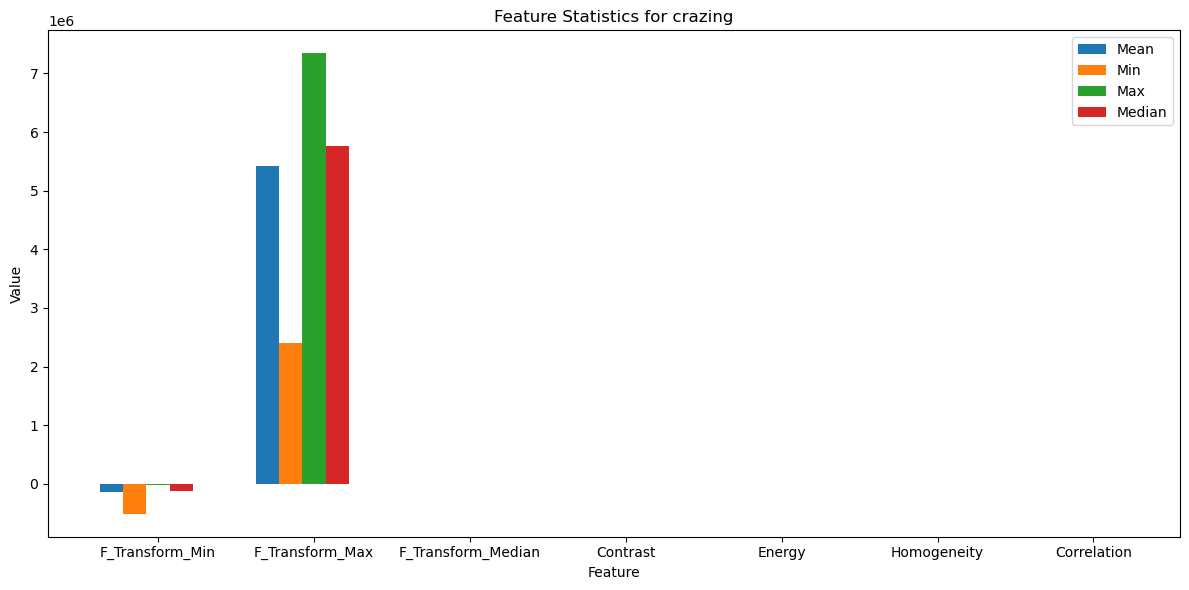

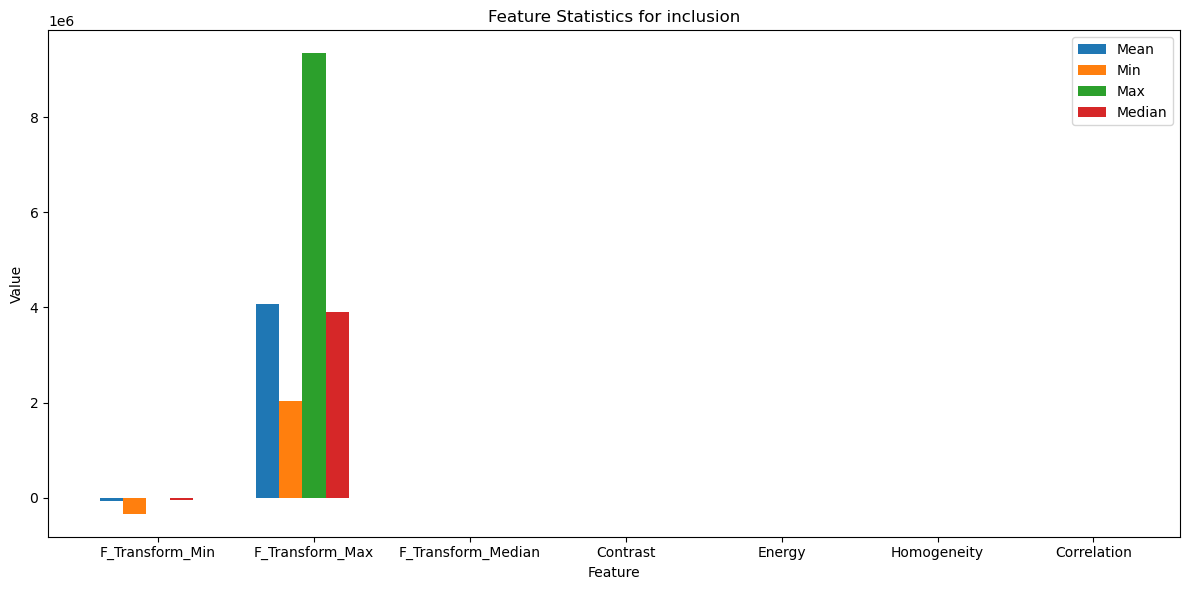

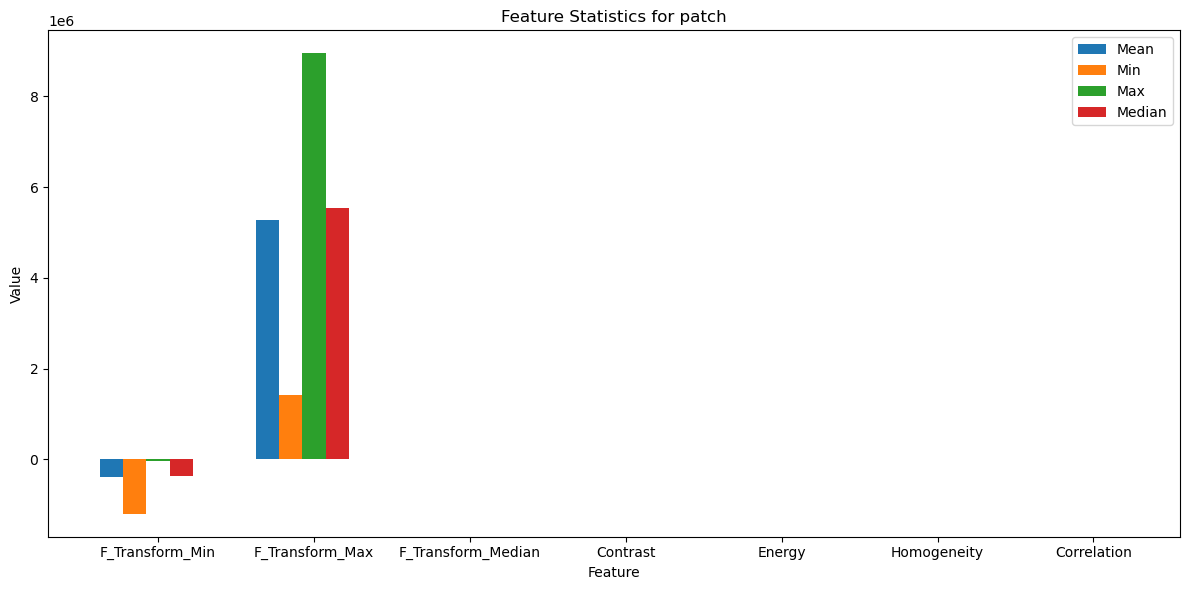

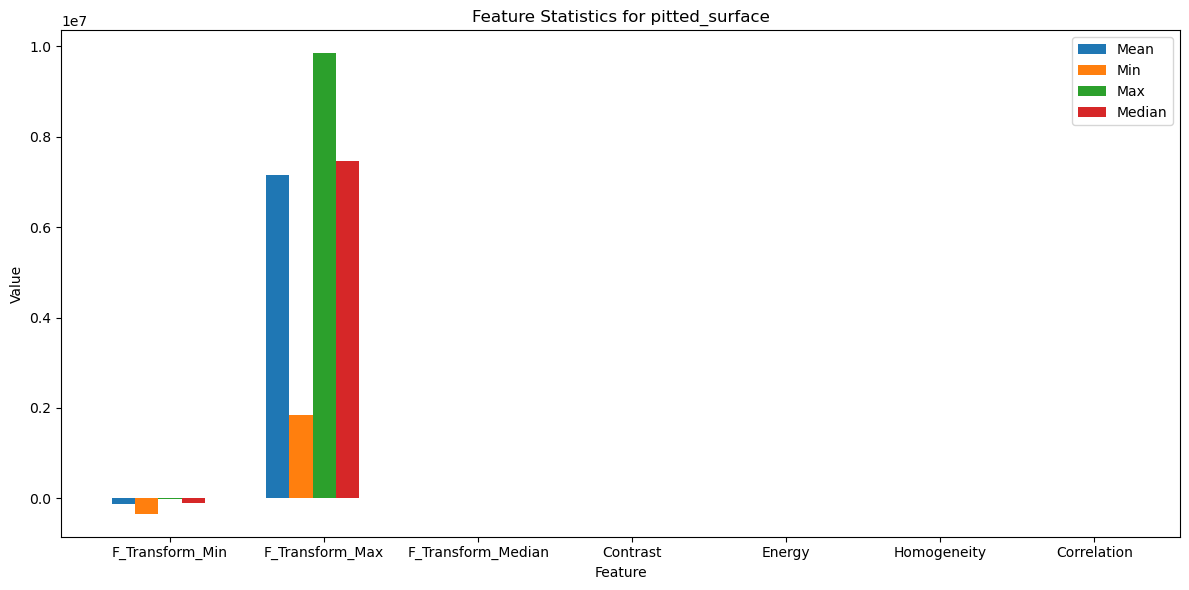

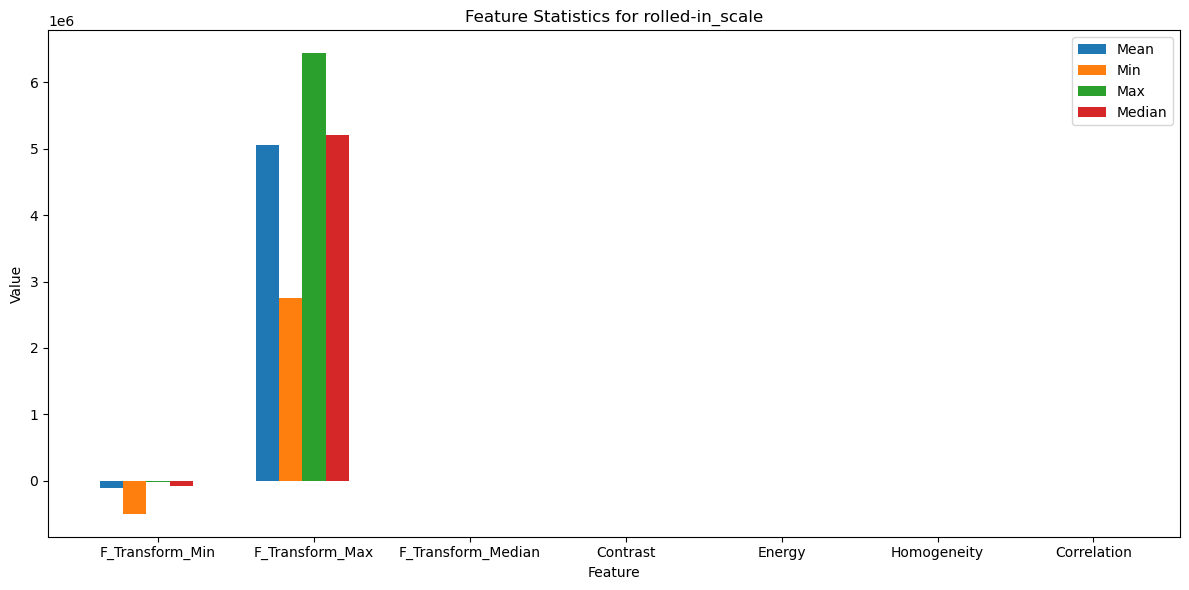

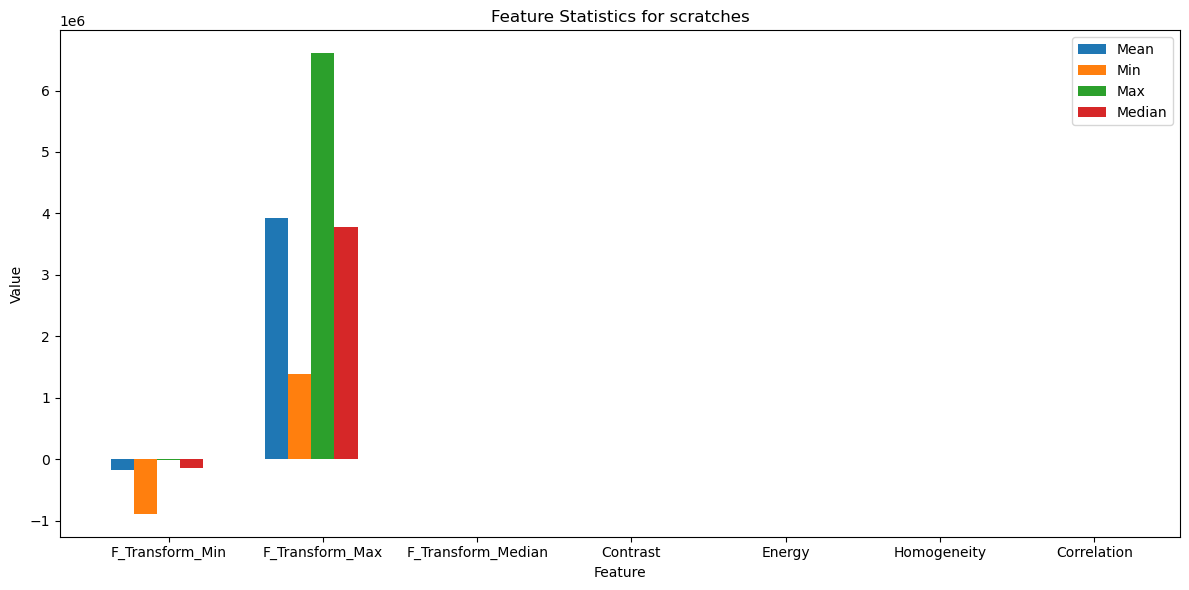

In [40]:
import os
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from scipy.fft import fft2, fftshift
import matplotlib.pyplot as plt

# Define the folders containing the images
folders = {
    "crazing": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/crazing",
    "inclusion": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/inclusion",
    "patch": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/patches",
    "pitted_surface": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/pitted_surface",
    "rolled-in_scale": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/rolled-in_scale",
    "scratches": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/scratches"
}

# Function to compute Fourier Transform of images
def compute_fourier_transform(img):
    f_transform = fftshift(fft2(img))
    return f_transform

# Function to compute Haralick Texture Features
def compute_haralick_features(img):
    glcm = graycomatrix(img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast').ravel()[0]
    energy = graycoprops(glcm, 'energy').ravel()[0]
    homogeneity = graycoprops(glcm, 'homogeneity').ravel()[0]
    correlation = graycoprops(glcm, 'correlation').ravel()[0]
    return contrast, energy, homogeneity, correlation

# Initialize lists to store feature values for each folder
folder_features = {folder_name: {'f_transform_min': [], 'f_transform_max': [], 'f_transform_median': [],
                                 'contrast': [], 'energy': [], 'homogeneity': [], 'correlation': []}
                   for folder_name in folders}

# Iterate over each folder containing images
for folder_name, folder_path in folders.items():
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # Compute Fourier Transform
        f_transform = compute_fourier_transform(img)
        
        # Compute Haralick Texture Features
        contrast, energy, homogeneity, correlation = compute_haralick_features(img)
        
        # Store feature values for the current image
        folder_features[folder_name]['f_transform_min'].append(np.min(f_transform))
        folder_features[folder_name]['f_transform_max'].append(np.max(f_transform))
        folder_features[folder_name]['f_transform_median'].append(np.median(f_transform))
        folder_features[folder_name]['contrast'].append(contrast)
        folder_features[folder_name]['energy'].append(energy)
        folder_features[folder_name]['homogeneity'].append(homogeneity)
        folder_features[folder_name]['correlation'].append(correlation)

# Plot bar charts for each folder
for folder_name, features in folder_features.items():
    plt.figure(figsize=(12, 6))
    bar_width = 0.15
    x = np.arange(len(features))
    
    plt.bar(x - 2*bar_width, [np.mean(features['f_transform_min']), np.mean(features['f_transform_max']),
                               np.mean(features['f_transform_median']), np.mean(features['contrast']),
                               np.mean(features['energy']), np.mean(features['homogeneity']),
                               np.mean(features['correlation'])],
            width=bar_width, label='Mean')
    
    plt.bar(x - bar_width, [np.min(features['f_transform_min']), np.min(features['f_transform_max']),
                             np.min(features['f_transform_median']), np.min(features['contrast']),
                             np.min(features['energy']), np.min(features['homogeneity']),
                             np.min(features['correlation'])],
            width=bar_width, label='Min')
    
    plt.bar(x, [np.max(features['f_transform_min']), np.max(features['f_transform_max']),
                np.max(features['f_transform_median']), np.max(features['contrast']),
                np.max(features['energy']), np.max(features['homogeneity']),
                np.max(features['correlation'])],
            width=bar_width, label='Max')
    
    plt.bar(x + bar_width, [np.median(features['f_transform_min']), np.median(features['f_transform_max']),
                             np.median(features['f_transform_median']), np.median(features['contrast']),
                             np.median(features['energy']), np.median(features['homogeneity']),
                             np.median(features['correlation'])],
            width=bar_width, label='Median')
    
    plt.xlabel('Feature')
    plt.ylabel('Value')
    plt.title(f'Feature Statistics for {folder_name}')
    plt.xticks(x, ['F_Transform_Min', 'F_Transform_Max', 'F_Transform_Median', 
                   'Contrast', 'Energy', 'Homogeneity', 'Correlation'])
    plt.legend()
    plt.tight_layout()
    plt.show()


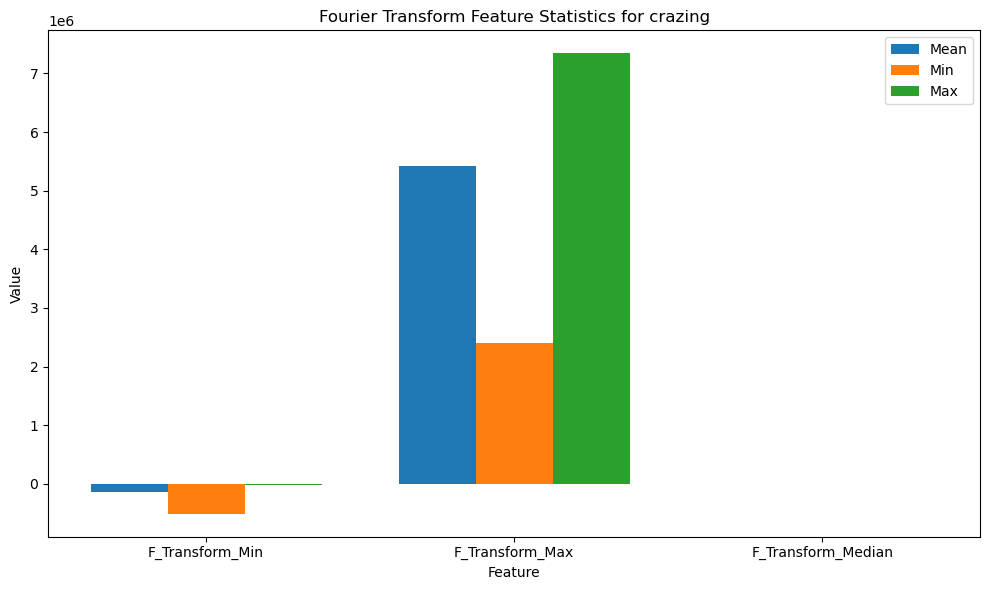

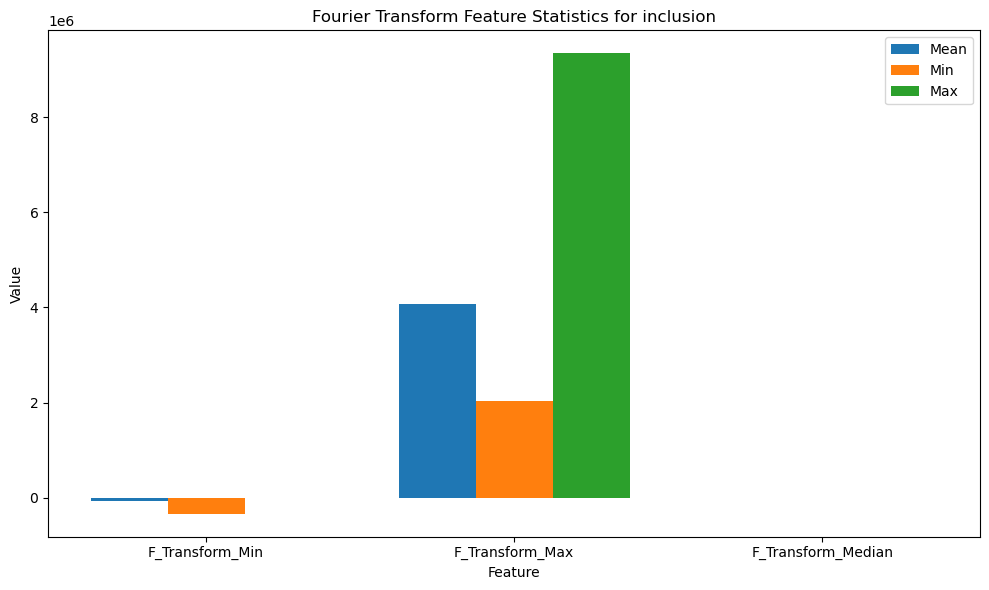

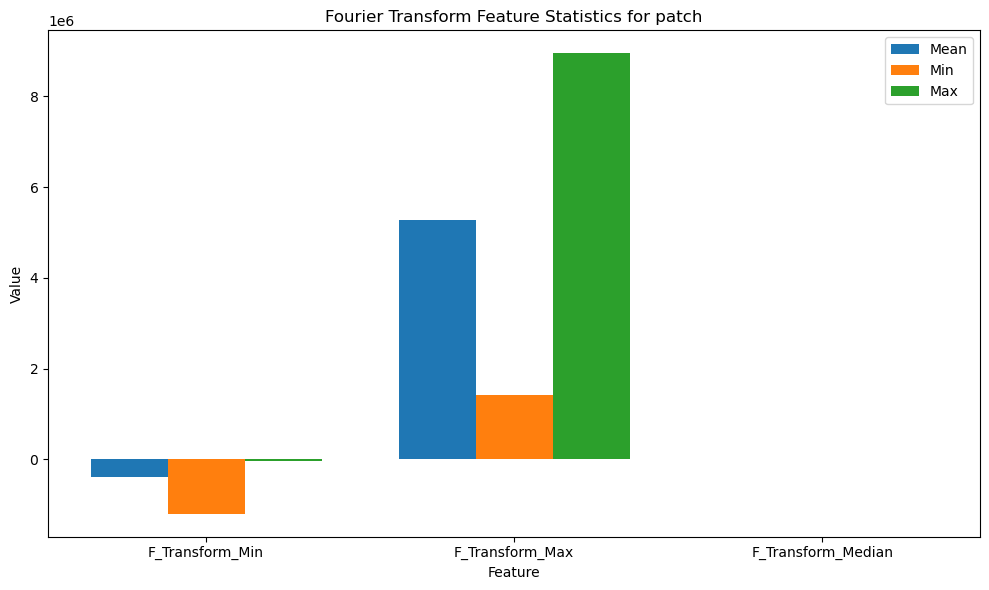

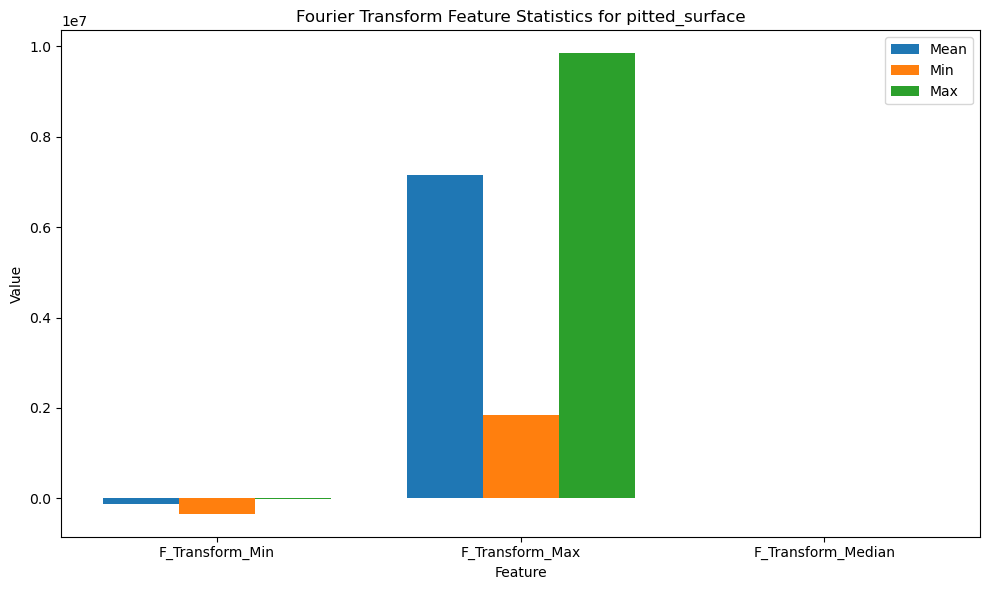

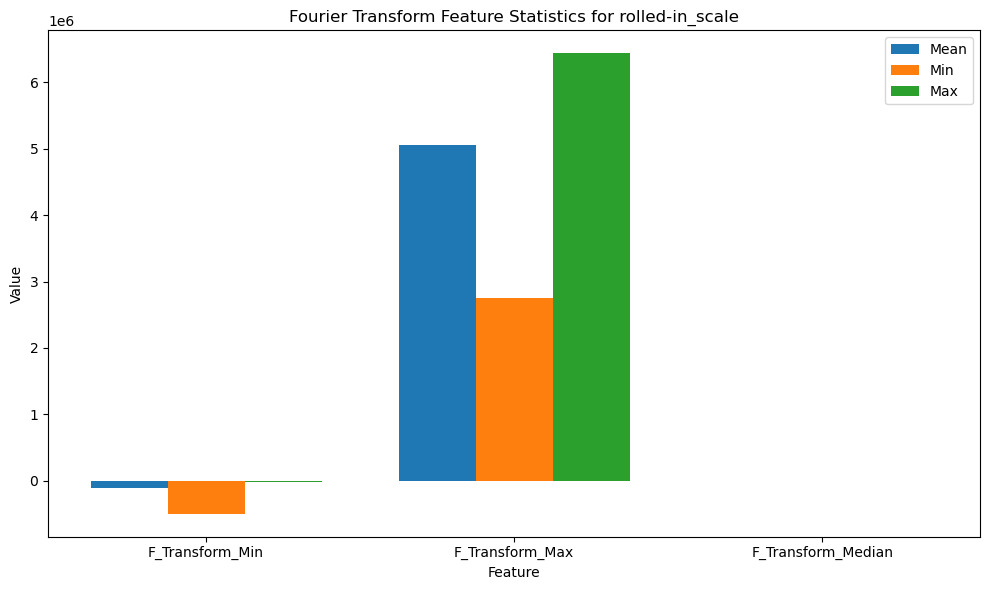

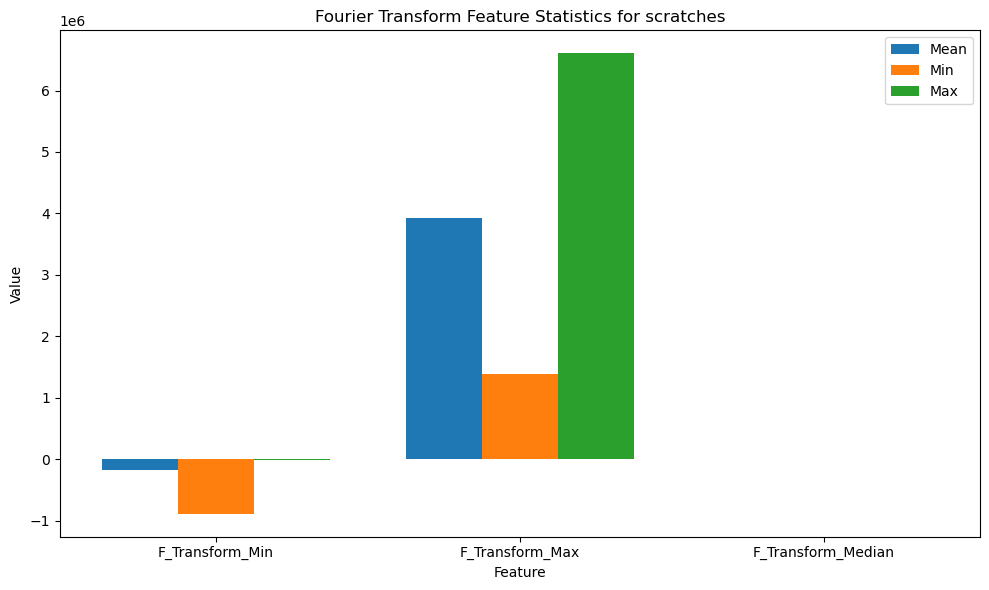

In [42]:
import os
import cv2
import numpy as np
from scipy.fft import fft2, fftshift
import matplotlib.pyplot as plt

# Define the folders containing the images
folders = {
    "crazing": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/crazing",
    "inclusion": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/inclusion",
    "patch": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/patches",
    "pitted_surface": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/pitted_surface",
    "rolled-in_scale": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/rolled-in_scale",
    "scratches": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/scratches"
}

# Function to compute Fourier Transform of images
def compute_fourier_transform(img):
    f_transform = fftshift(fft2(img))
    return f_transform

# Initialize lists to store Fourier Transform feature values for each folder
folder_fourier_features = {folder_name: {'f_transform_min': [], 'f_transform_max': [], 'f_transform_median': []}
                           for folder_name in folders}

# Iterate over each folder containing images
for folder_name, folder_path in folders.items():
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # Compute Fourier Transform
        f_transform = compute_fourier_transform(img)
        
        # Store Fourier Transform feature values for the current image
        folder_fourier_features[folder_name]['f_transform_min'].append(np.min(f_transform))
        folder_fourier_features[folder_name]['f_transform_max'].append(np.max(f_transform))
        folder_fourier_features[folder_name]['f_transform_median'].append(np.median(f_transform))

# Plot bar charts for Fourier Transform features for each folder
for folder_name, features in folder_fourier_features.items():
    plt.figure(figsize=(10, 6))
    bar_width = 0.25
    x = np.arange(len(features))
    
    plt.bar(x - bar_width, [np.mean(features['f_transform_min']), np.mean(features['f_transform_max']),
                            np.mean(features['f_transform_median'])],
            width=bar_width, label='Mean')
    
    plt.bar(x, [np.min(features['f_transform_min']), np.min(features['f_transform_max']),
                np.min(features['f_transform_median'])],
            width=bar_width, label='Min')
    
    plt.bar(x + bar_width, [np.max(features['f_transform_min']), np.max(features['f_transform_max']),
                             np.max(features['f_transform_median'])],
            width=bar_width, label='Max')
    
    plt.xlabel('Feature')
    plt.ylabel('Value')
    plt.title(f'Fourier Transform Feature Statistics for {folder_name}')
    plt.xticks(x, ['F_Transform_Min', 'F_Transform_Max', 'F_Transform_Median'])
    plt.legend()
    plt.tight_layout()
    plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (3,).

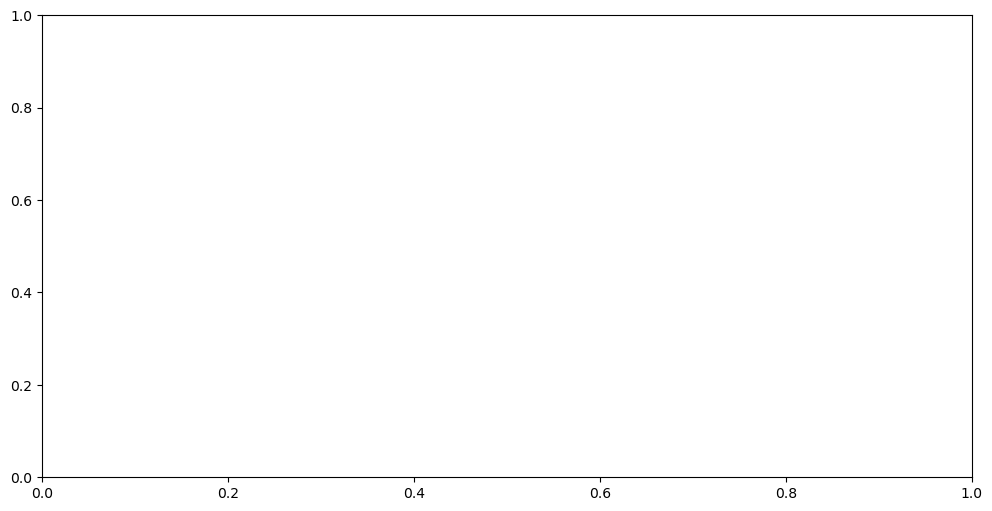

In [43]:
import os
import cv2
import numpy as np
from scipy.fft import fft2, fftshift
import matplotlib.pyplot as plt

# Define the folders containing the images
folders = {
    "crazing": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/crazing",
    "inclusion": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/inclusion",
    "patch": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/patches",
    "pitted_surface": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/pitted_surface",
    "rolled-in_scale": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/rolled-in_scale",
    "scratches": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/scratches"
}

# Function to compute Fourier Transform of images
def compute_fourier_transform(img):
    f_transform = fftshift(fft2(img))
    return f_transform

# Initialize lists to store Fourier Transform feature values for each folder
folder_fourier_features = {folder_name: {'f_transform_min': [], 'f_transform_max': [], 'f_transform_median': []}
                           for folder_name in folders}

# Iterate over each folder containing images
for folder_name, folder_path in folders.items():
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # Compute Fourier Transform
        f_transform = compute_fourier_transform(img)
        
        # Store Fourier Transform feature values for the current image
        folder_fourier_features[folder_name]['f_transform_min'].append(np.min(f_transform))
        folder_fourier_features[folder_name]['f_transform_max'].append(np.max(f_transform))
        folder_fourier_features[folder_name]['f_transform_median'].append(np.median(f_transform))

# Plot bar chart for Fourier Transform features for each folder
plt.figure(figsize=(12, 6))
bar_width = 0.2
x = np.arange(len(folders))

for i, (folder_name, features) in enumerate(folder_fourier_features.items()):
    plt.bar(x + (i - 1) * bar_width, [np.mean(features['f_transform_min']), np.mean(features['f_transform_max']),
                                       np.mean(features['f_transform_median'])],
            width=bar_width, label=folder_name)

plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('Fourier Transform Feature Statistics')
plt.xticks(x, ['F_Transform_Min', 'F_Transform_Max', 'F_Transform_Median'])
plt.legend()
plt.tight_layout()
plt.show()


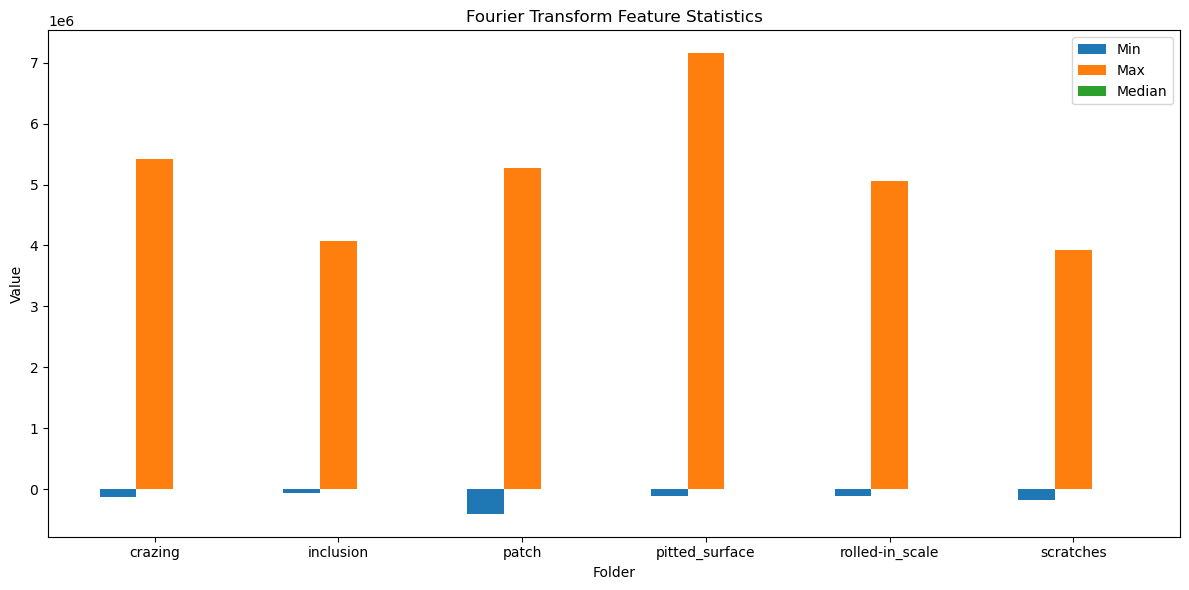

In [44]:
import os
import cv2
import numpy as np
from scipy.fft import fft2, fftshift
import matplotlib.pyplot as plt

# Define the folders containing the images
folders = {
    "crazing": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/crazing",
    "inclusion": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/inclusion",
    "patch": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/patches",
    "pitted_surface": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/pitted_surface",
    "rolled-in_scale": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/rolled-in_scale",
    "scratches": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/scratches"
}

# Function to compute Fourier Transform of images
def compute_fourier_transform(img):
    f_transform = fftshift(fft2(img))
    return f_transform

# Initialize lists to store Fourier Transform feature values for each folder
f_transform_min_vals = []
f_transform_max_vals = []
f_transform_median_vals = []
folder_names = []

# Iterate over each folder containing images
for folder_name, folder_path in folders.items():
    folder_names.append(folder_name)
    f_transform_min = []
    f_transform_max = []
    f_transform_median = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # Compute Fourier Transform
        f_transform = compute_fourier_transform(img)
        
        # Store Fourier Transform feature values for the current image
        f_transform_min.append(np.min(f_transform))
        f_transform_max.append(np.max(f_transform))
        f_transform_median.append(np.median(f_transform))
    
    # Store the mean values for each feature
    f_transform_min_vals.append(np.mean(f_transform_min))
    f_transform_max_vals.append(np.mean(f_transform_max))
    f_transform_median_vals.append(np.mean(f_transform_median))

# Plot bar chart for Fourier Transform features for each folder
plt.figure(figsize=(12, 6))
bar_width = 0.2
x = np.arange(len(folder_names))

plt.bar(x - bar_width, f_transform_min_vals, width=bar_width, label='Min')
plt.bar(x, f_transform_max_vals, width=bar_width, label='Max')
plt.bar(x + bar_width, f_transform_median_vals, width=bar_width, label='Median')

plt.xlabel('Folder')
plt.ylabel('Value')
plt.title('Fourier Transform Feature Statistics')
plt.xticks(x, folder_names)
plt.legend()
plt.tight_layout()
plt.show()


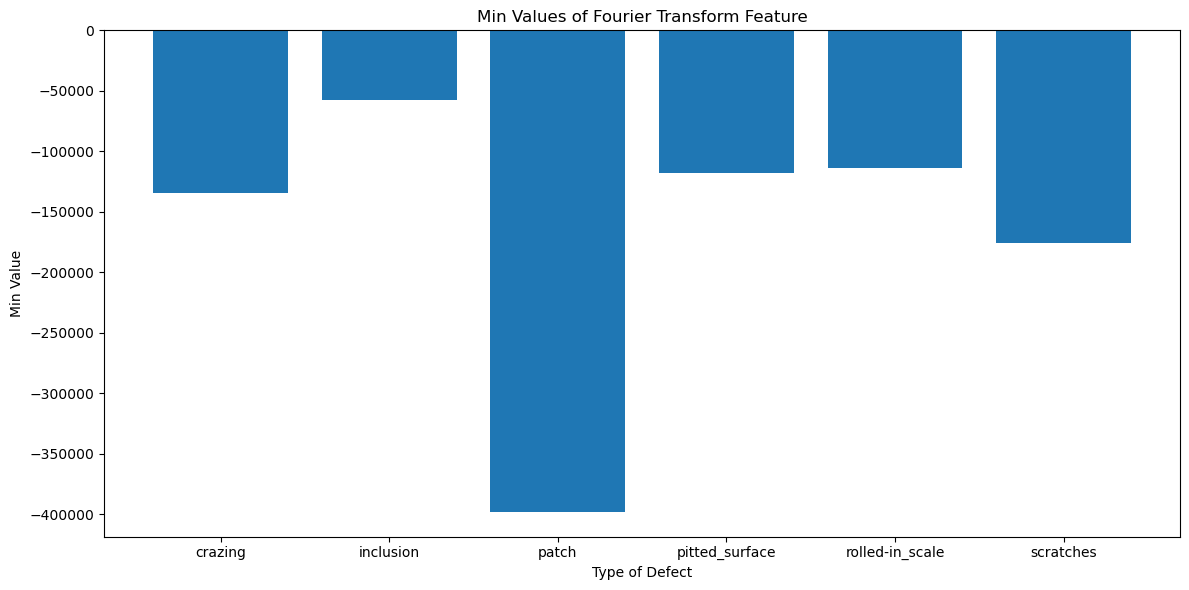

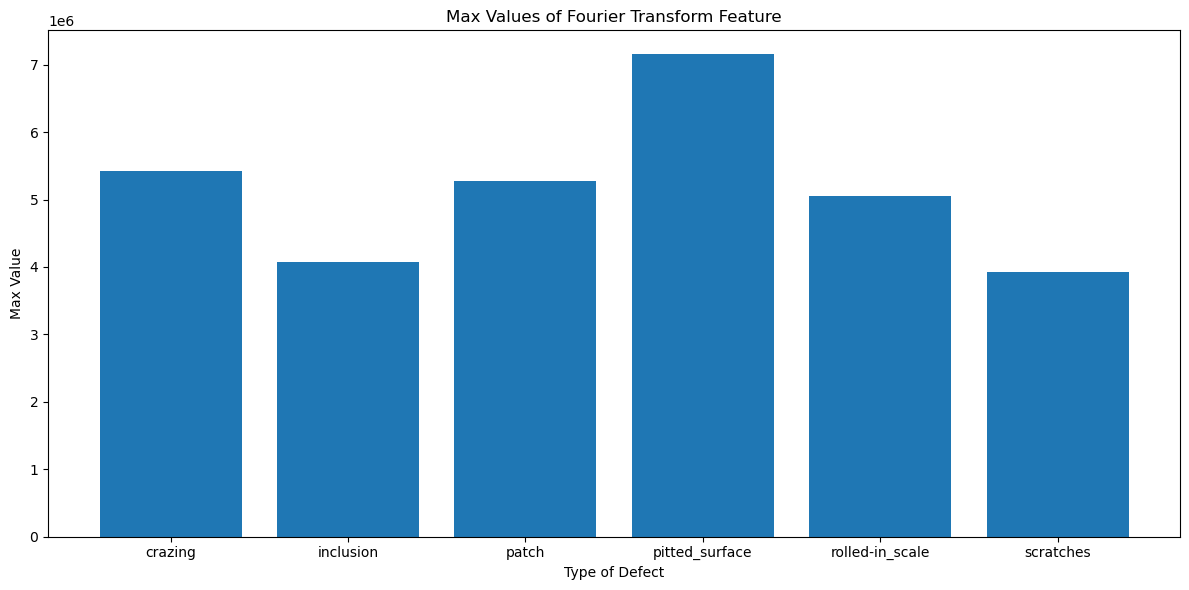

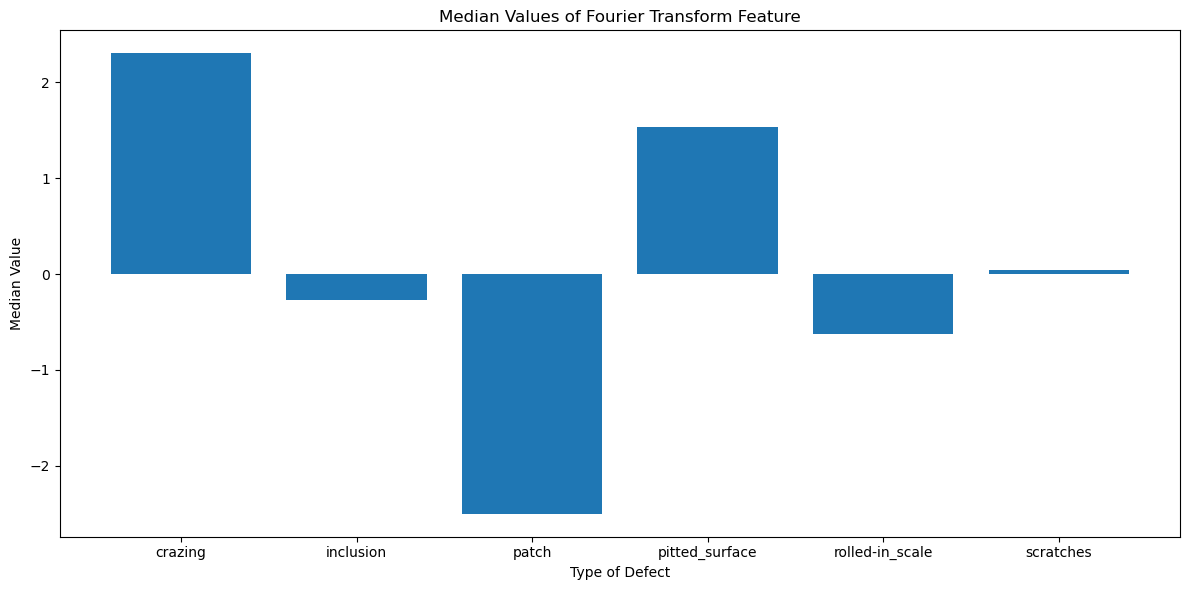

In [48]:
import os
import cv2
import numpy as np
from scipy.fft import fft2, fftshift
import matplotlib.pyplot as plt

# Define the folders containing the images
folders = {
    "crazing": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/crazing",
    "inclusion": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/inclusion",
    "patch": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/patches",
    "pitted_surface": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/pitted_surface",
    "rolled-in_scale": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/rolled-in_scale",
    "scratches": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/scratches"
}

# Function to compute Fourier Transform of images
def compute_fourier_transform(img):
    f_transform = fftshift(fft2(img))
    return f_transform

# Initialize lists to store Fourier Transform feature values for each folder
f_transform_min_vals = []
f_transform_max_vals = []
f_transform_median_vals = []
folder_names = []

# Iterate over each folder containing images
for folder_name, folder_path in folders.items():
    folder_names.append(folder_name)
    f_transform_min = []
    f_transform_max = []
    f_transform_median = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # Compute Fourier Transform
        f_transform = compute_fourier_transform(img)
        
        # Store Fourier Transform feature values for the current image
        f_transform_min.append(np.min(f_transform))
        f_transform_max.append(np.max(f_transform))
        f_transform_median.append(np.median(f_transform))
    
    # Store the mean values for each feature
    f_transform_min_vals.append(np.mean(f_transform_min))
    f_transform_max_vals.append(np.mean(f_transform_max))
    f_transform_median_vals.append(np.mean(f_transform_median))

# Plot bar chart for Min values of Fourier Transform features for each folder
plt.figure(figsize=(12, 6))
x = np.arange(len(folder_names))
plt.bar(x, f_transform_min_vals)
plt.xlabel('Type of Defect')
plt.ylabel('Min Value')
plt.title('Min Values of Fourier Transform Feature')
plt.xticks(x, folder_names)
plt.tight_layout()
plt.show()

# Plot bar chart for Max values of Fourier Transform features for each folder
plt.figure(figsize=(12, 6))
plt.bar(x, f_transform_max_vals)
plt.xlabel('Type of Defect')
plt.ylabel('Max Value')
plt.title('Max Values of Fourier Transform Feature')
plt.xticks(x, folder_names)
plt.tight_layout()
plt.show()

# Plot bar chart for Median values of Fourier Transform features for each folder
plt.figure(figsize=(12, 6))
plt.bar(x, f_transform_median_vals)
plt.xlabel('Type of Defect')
plt.ylabel('Median Value')
plt.title('Median Values of Fourier Transform Feature')
plt.xticks(x, folder_names)
plt.tight_layout()
plt.show()


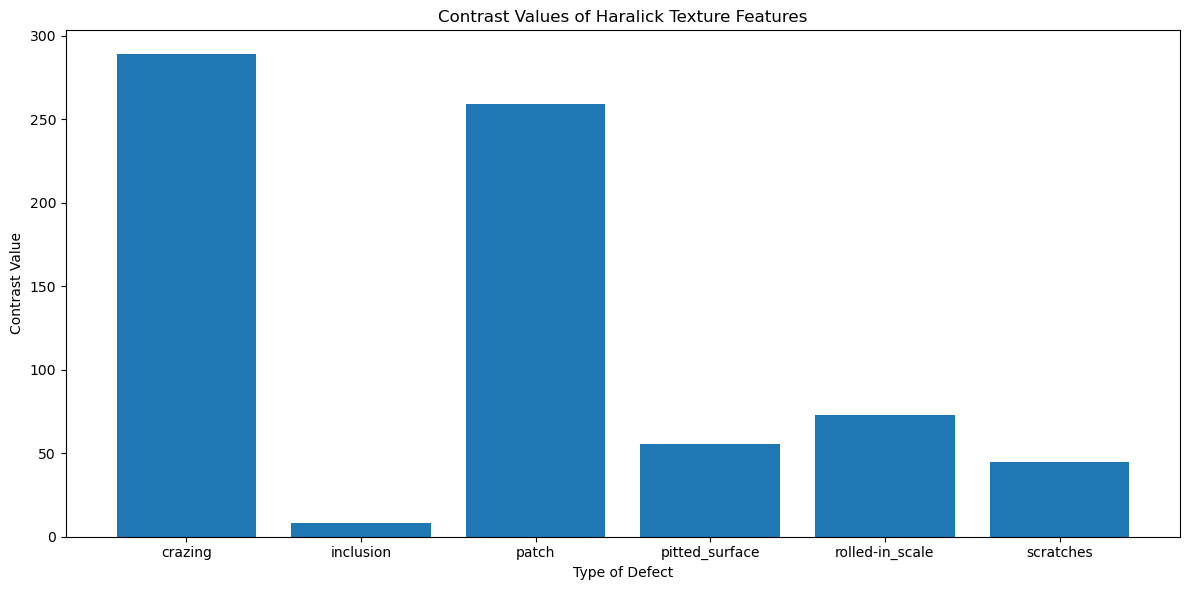

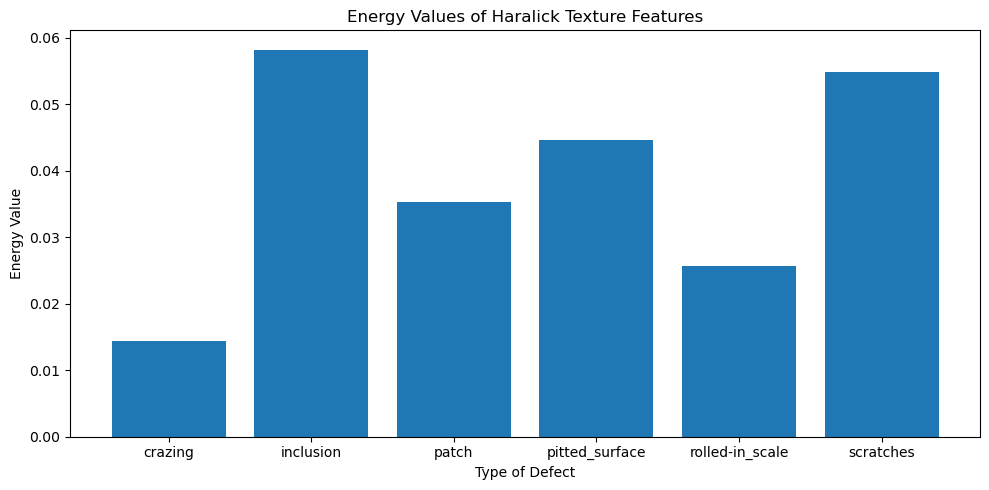

In [51]:
import os
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
import matplotlib.pyplot as plt

# Define the folders containing the images
folders = {
    "crazing": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/crazing",
    "inclusion": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/inclusion",
    "patch": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/patches",
    "pitted_surface": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/pitted_surface",
    "rolled-in_scale": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/rolled-in_scale",
    "scratches": "C:/Users/Checkout/Desktop/GWAR/Project/Dataset/NEU-DET/train/images/scratches"
}

# Function to compute Haralick Texture Features of images
def compute_haralick_features(img):
    glcm = graycomatrix(img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast').ravel()[0]
    energy = graycoprops(glcm, 'energy').ravel()[0]
    homogeneity = graycoprops(glcm, 'homogeneity').ravel()[0]
    correlation = graycoprops(glcm, 'correlation').ravel()[0]
    return contrast, energy, homogeneity, correlation

# Initialize lists to store Haralick Texture Feature values for each folder
haralick_contrast_vals = []
haralick_energy_vals = []
haralick_homogeneity_vals = []
haralick_correlation_vals = []

# Iterate over each folder containing images
for folder_name, folder_path in folders.items():
    contrast_vals = []
    energy_vals = []
    homogeneity_vals = []
    correlation_vals = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # Compute Haralick Texture Features
        contrast, energy, homogeneity, correlation = compute_haralick_features(img)
        
        # Store Haralick Texture Feature values for the current image
        contrast_vals.append(contrast)
        energy_vals.append(energy)
        homogeneity_vals.append(homogeneity)
        correlation_vals.append(correlation)
    
    # Store the mean values for each feature
    haralick_contrast_vals.append(np.mean(contrast_vals))
    haralick_energy_vals.append(np.mean(energy_vals))
    haralick_homogeneity_vals.append(np.mean(homogeneity_vals))
    haralick_correlation_vals.append(np.mean(correlation_vals))

# Plot bar chart for Contrast values of Haralick Texture Features for each folder
plt.figure(figsize=(12, 6))
x = np.arange(len(folders))
plt.bar(x, haralick_contrast_vals)
plt.xlabel('Type of Defect')
plt.ylabel('Contrast Value')
plt.title('Contrast Values of Haralick Texture Features')
plt.xticks(x, folders.keys())
plt.tight_layout()
plt.show()

# Plot bar chart for Energy values of Haralick Texture Features for each folder
plt.figure(figsize=(10, 5))
plt.bar(x, haralick_energy_vals)
plt.xlabel('Type of Defect')
plt.ylabel('Energy Value')
plt.title('Energy Values of Haralick Texture Features')
plt.xticks(x, folders.keys())
plt.tight_layout()
plt.show()



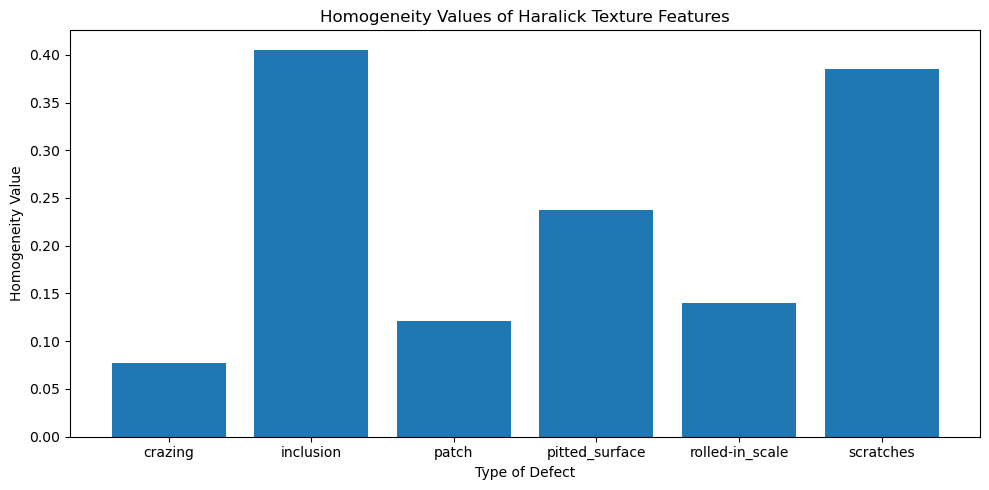

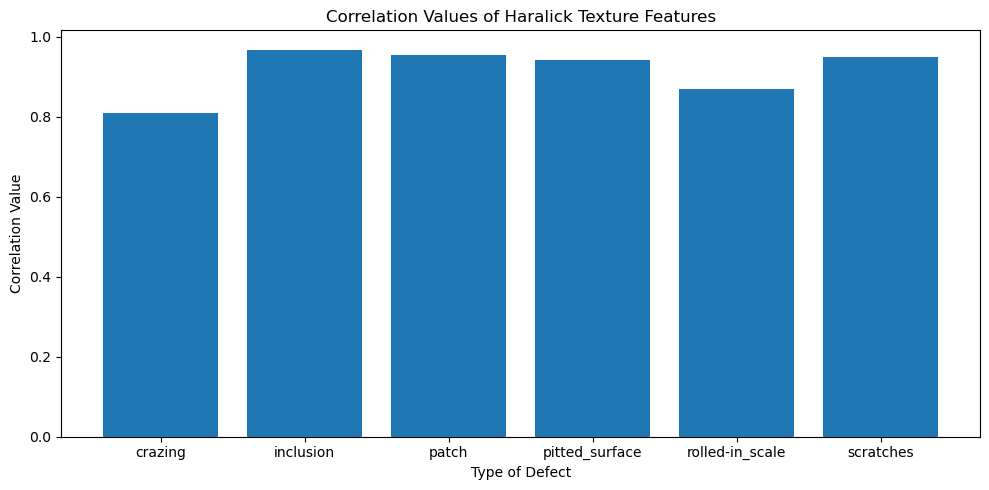

In [52]:
# Plot bar chart for Homogeneity values of Haralick Texture Features for each folder
plt.figure(figsize=(10, 5))
plt.bar(x, haralick_homogeneity_vals)
plt.xlabel('Type of Defect')
plt.ylabel('Homogeneity Value')
plt.title('Homogeneity Values of Haralick Texture Features')
plt.xticks(x, folders.keys())
plt.tight_layout()
plt.show()

# Plot bar chart for Correlation values of Haralick Texture Features for each folder
plt.figure(figsize=(10, 5))
plt.bar(x, haralick_correlation_vals)
plt.xlabel('Type of Defect')
plt.ylabel('Correlation Value')
plt.title('Correlation Values of Haralick Texture Features')
plt.xticks(x, folders.keys())
plt.tight_layout()
plt.show()
